# Load the data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [2]:
data=pd.read_excel('Songs_2024.xlsx',sheet_name='spotify songs')
df_songs=data.copy(deep=True)
df_songs.head()


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
0,2009,Love Story,81,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.617,0.741,2.0,59.0,1.0,0.0311,0.13100,0.000000,0.0772,0.306,118.984,236267.0
1,2009,You Belong With Me,77,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.687,0.745,6.0,64.0,1.0,0.0379,0.17800,0.000016,0.1110,0.435,129.966,232120.0
2,2010,Back To December,68,Speak Now,Taylor Swift,['pop'],100,0.529,0.670,2.0,66.0,1.0,0.0303,0.11700,0.000000,0.3340,0.286,141.893,293027.0
3,2010,Mine,66,Speak Now,Taylor Swift,['pop'],100,0.624,0.757,7.0,46.0,1.0,0.0296,0.00265,0.000002,0.1890,0.658,121.070,230707.0
4,2010,Today Was A Fairytale,53,Today Was A Fairytale,Taylor Swift,['pop'],100,0.491,0.703,7.0,65.0,1.0,0.0319,0.03070,0.000006,0.1670,0.344,157.988,242480.0


# EDA

In [3]:
# Shape
print("shape",df_songs.shape)
# Info 
print("\ninfo:")
df_songs.info()
print("One song with null values:")
df_songs[df_songs.liveness.isnull()]
print("Dropping null values")

df_songs.dropna(inplace=True)


shape (2300, 19)

info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2300 entries, 0 to 2299
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   year               2300 non-null   int64  
 1   track_name         2300 non-null   object 
 2   track_popularity   2300 non-null   int64  
 3   album              2300 non-null   object 
 4   artist_name        2300 non-null   object 
 5   artist_genres      2300 non-null   object 
 6   artist_popularity  2300 non-null   int64  
 7   danceability       2299 non-null   float64
 8   energy             2299 non-null   float64
 9   key                2299 non-null   float64
 10  loudness           2299 non-null   float64
 11  mode               2299 non-null   float64
 12  speechiness        2299 non-null   float64
 13  acousticness       2299 non-null   float64
 14  instrumentalness   2299 non-null   float64
 15  liveness           2299 non-null   float64
 16  

In [4]:
# Describe the Dataset
df_songs.describe(include='all')

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms
count,2299.000000,2299,2299.000000,2299,2299,2299,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000,2299.000000
unique,NaN,2120,NaN,1663,891,698,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Home,NaN,18 Months,Drake,['pop'],NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,5,NaN,8,32,135,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,2011.003045,NaN,70.944759,NaN,NaN,NaN,72.873423,0.660116,0.693047,5.277947,73.006960,0.598521,0.097795,0.157689,0.013766,0.172618,0.535110,120.512450,226033.494128
std,6.634528,NaN,12.294047,NaN,NaN,NaN,12.180506,0.141137,0.164838,3.628494,15.643937,0.490304,0.092445,0.203844,0.083990,0.131620,0.227821,27.617729,42063.678588
min,2000.000000,NaN,0.000000,NaN,NaN,NaN,29.000000,0.162000,0.051900,0.000000,-56.000000,0.000000,0.022500,0.000013,0.000000,0.021000,0.037700,60.019000,97393.000000
25%,2005.000000,NaN,66.000000,NaN,NaN,NaN,65.000000,0.572000,0.586000,2.000000,63.000000,0.000000,0.038000,0.016500,0.000000,0.089950,0.360500,98.569500,200179.500000
50%,2011.000000,NaN,72.000000,NaN,NaN,NaN,74.000000,0.671000,0.712000,5.000000,74.000000,1.000000,0.056800,0.068900,0.000000,0.119000,0.540000,120.000000,221653.000000
75%,2017.000000,NaN,79.000000,NaN,NaN,NaN,82.000000,0.759500,0.820000,8.000000,83.000000,1.000000,0.115500,0.223000,0.000054,0.220000,0.722000,137.028000,245950.000000


In [5]:
# Categorical variables
cat_vars = ['year', 'key', 'mode']  #

# numerical variables
num_vars = list(df_songs.drop(columns=cat_vars).select_dtypes(include=['float64', 'int64']).columns)

# Convert the categorical columns to category type
# df_songs.year=df_songs.year.astype('category')
# df_songs.key=df_songs.key.astype('category')
# df_songs["mode"]=df_songs["mode"].astype('category')
df_songs[cat_vars] = df_songs[cat_vars].astype('category')
df_songs.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2299 entries, 0 to 2299
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   year               2299 non-null   category
 1   track_name         2299 non-null   object  
 2   track_popularity   2299 non-null   int64   
 3   album              2299 non-null   object  
 4   artist_name        2299 non-null   object  
 5   artist_genres      2299 non-null   object  
 6   artist_popularity  2299 non-null   int64   
 7   danceability       2299 non-null   float64 
 8   energy             2299 non-null   float64 
 9   key                2299 non-null   category
 10  loudness           2299 non-null   float64 
 11  mode               2299 non-null   category
 12  speechiness        2299 non-null   float64 
 13  acousticness       2299 non-null   float64 
 14  instrumentalness   2299 non-null   float64 
 15  liveness           2299 non-null   float64 
 16  valenc

In [6]:
# filter those with no genres
df_songs = df_songs[df_songs['artist_genres'] != "[]"]

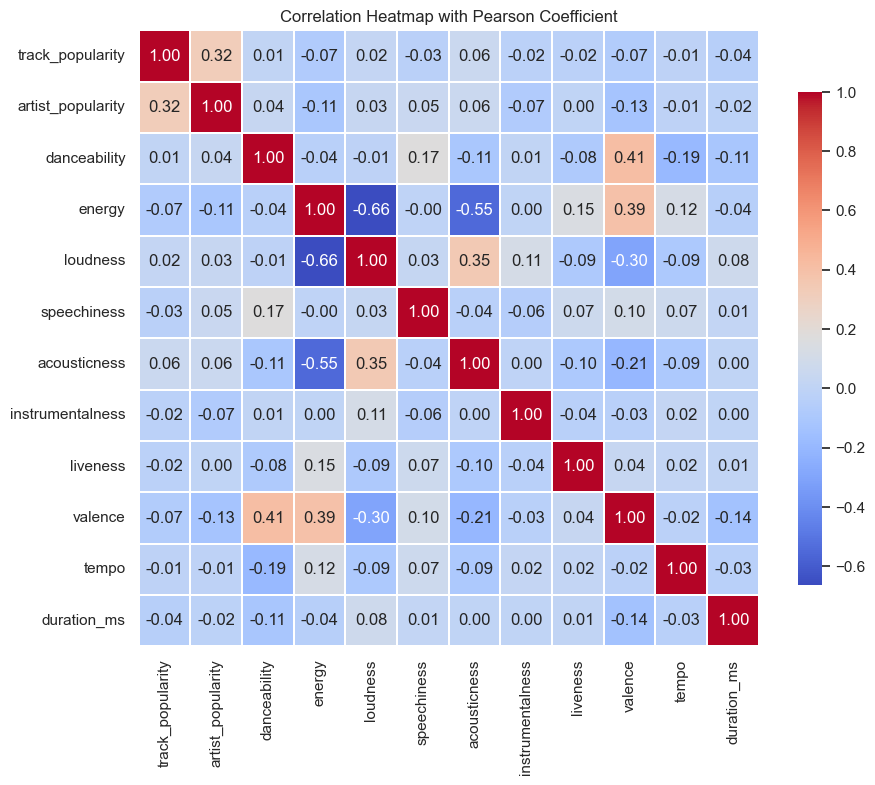

In [7]:
# Calculate the correlation matrix
corr_matrix = df_songs.corr()

sns.set_theme()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm',
            cbar_kws={"shrink": .8}, linewidths=.05)

# Add title
plt.title('Correlation Heatmap with Pearson Coefficient')

# Show the plot
plt.show()

<AxesSubplot:title={'center':'Correlation with track_popularity'}>

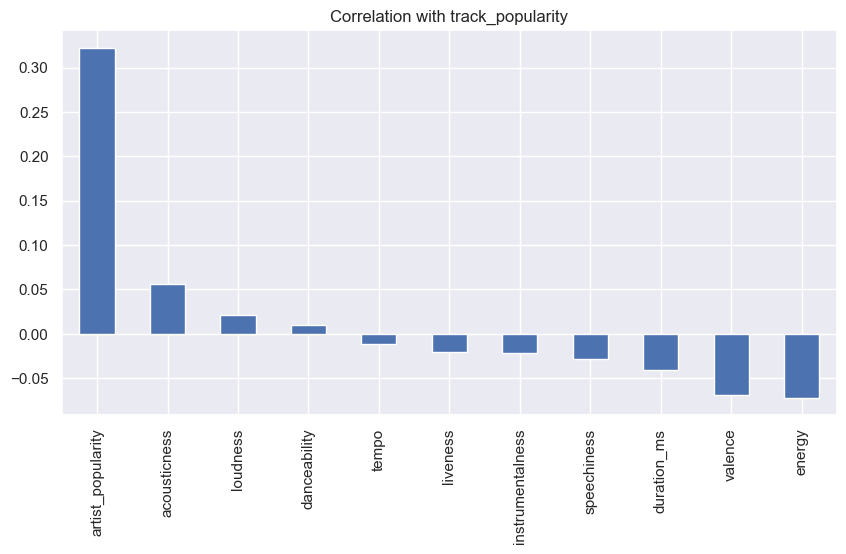

In [8]:
import seaborn as sns

sns.set_theme()

df_songs[cat_vars+num_vars].corr().sort_values(by='track_popularity',ascending=False).loc[:,'track_popularity'].iloc[1:].plot(kind='bar',grid=True,title='Correlation with track_popularity',figsize=(10,5))

### DON'T RUN // Pairplot

In [9]:
# commented so we don't run it because it takes time
# g = sns.pairplot(df_songs)
# g.map_upper(sns.kdeplot, levels=4, color=".2")
# plt.show()

# Seaborn pairplot, shows the relationship between the features
# Only artist_popularity seems to have some correlation with the target variable before binning (track_popularity)

### Distribution of variables

In [10]:


# # Set up the matplotlib figure - adjust the size as needed
# plt.figure(figsize=(15, 45))

# # Loop through the numeric columns for distribution plots
# for i, col in enumerate(num_vars, 1):
#     plt.subplot((len(num_vars) + len(cat_vars)) // 3 + 1, 3, i)
#     sns.histplot(df_songs[col], kde=False)
#     plt.title(f'Distribution of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Frequency')

# # Loop through the categorical columns for count plots
# for j, col in enumerate(cat_vars, i + 1):
#     plt.subplot((len(cat_vars) + len(num_vars)) // 3 + 1, 3, j)
#     sns.countplot(x=col, data=df_songs,color='#4C72B0')
#     plt.title(f'Count of {col}')
#     plt.xlabel(col)
#     plt.ylabel('Count')

# # Adjust layout for better fit and to prevent label overlap
# plt.tight_layout()
# plt.show()

### Distribution of popularity

Text(0, 0.5, 'Count')

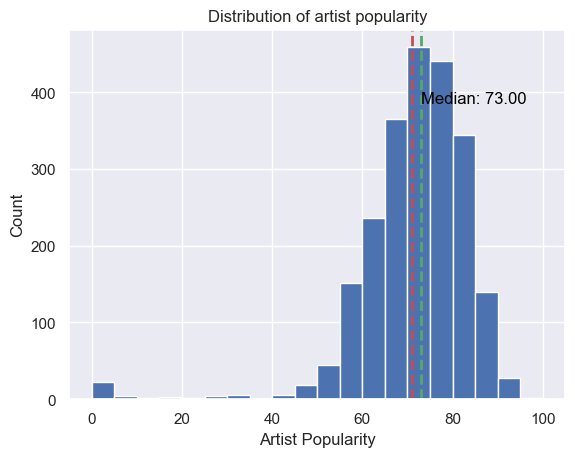

In [11]:
# Distribution of Popularity


df_songs.track_popularity.hist(bins=20)
target_popularity=df_songs.track_popularity.quantile(0.50)



mean_popularity = df_songs.track_popularity.mean()
median_popularity = df_songs.track_popularity.median()



# Adding the mean
plt.axvline(mean_popularity, color='r', linestyle='dashed', linewidth=2, label=f'Mean: {mean_popularity:.2f}')

# Adding the median
plt.axvline(median_popularity, color='g', linestyle='dashed', linewidth=2, label=f'Median: {median_popularity:.2f}')
plt.text(median_popularity, plt.ylim()[1]*0.8, f'Median: {median_popularity:.2f}', color='black', ha='left')
plt.title('Distribution of artist popularity')
plt.xlabel('Artist Popularity')
plt.ylabel('Count')

### Distribution of genres

Text(0, 0.5, 'Count')

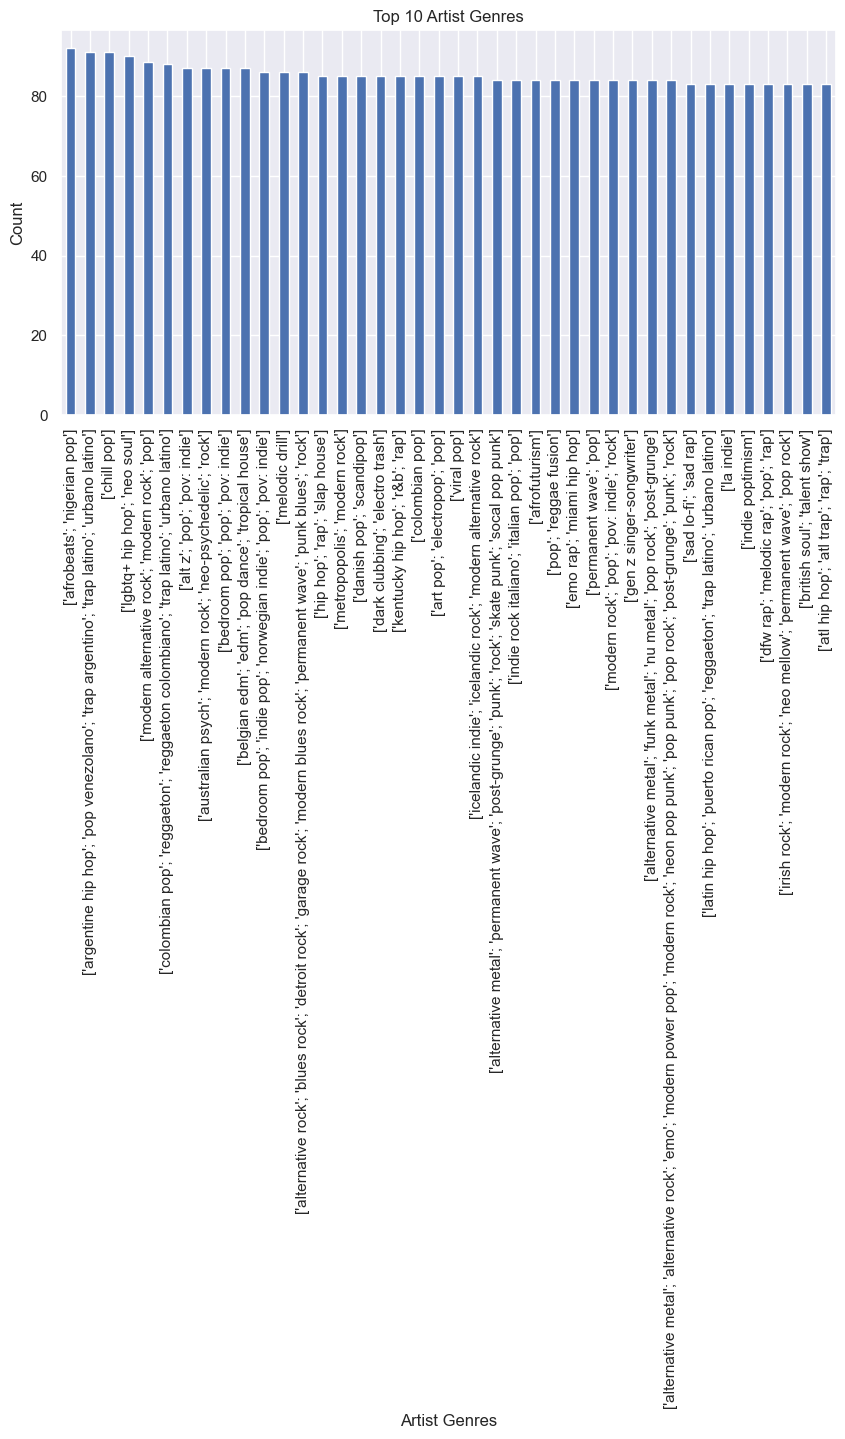

In [12]:
# artist_genres need to be encoded somehow (?)

df_songs.groupby(['artist_genres']).track_popularity.median().sort_values(ascending=False).head(40).plot(kind='bar',
                                                                                                         title='Top 10 Artist Genres',
                                                                                                         figsize=(10,5)
                                                                                                                                                                                                                     
                                                                                                         )
plt.xlabel('Artist Genres')
plt.ylabel('Count')

437 355


Text(0, 0.5, 'Count')

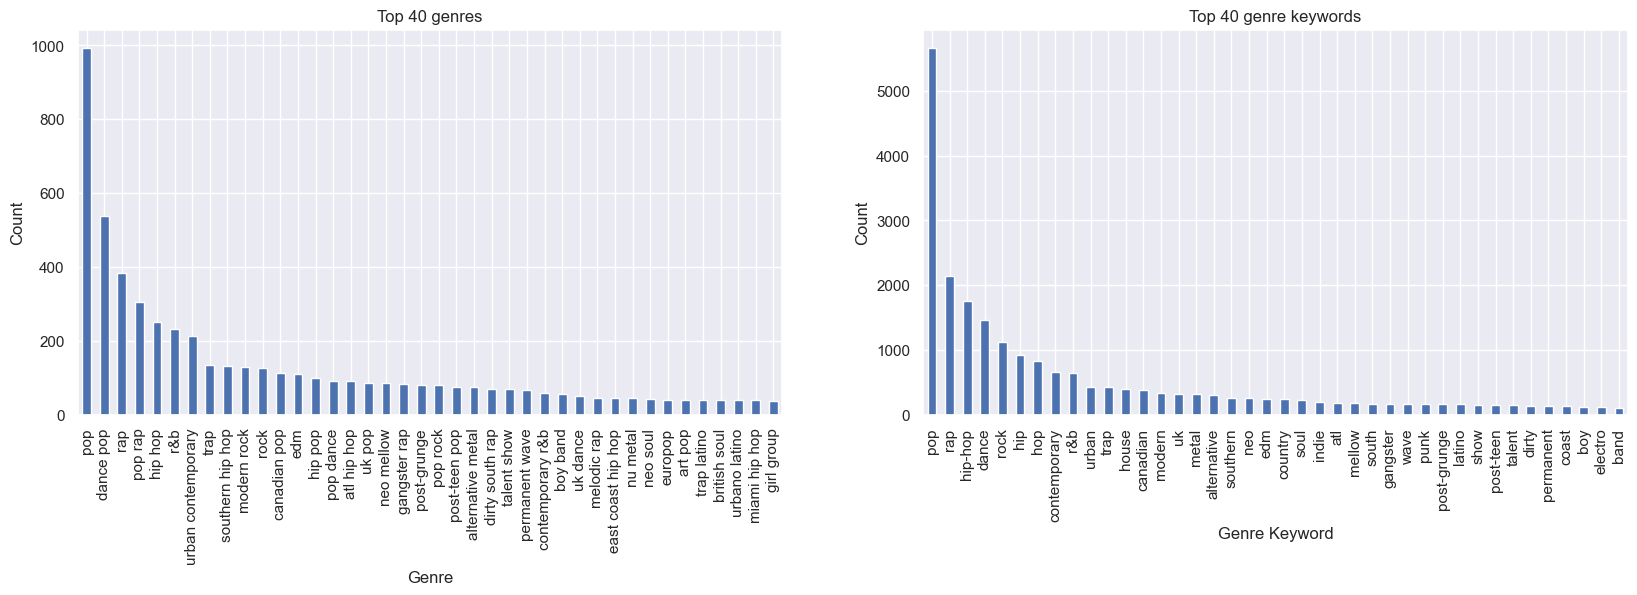

In [13]:
# Genres
genres=[]
genwords=[]

for i in df_songs.artist_genres:
    slist=i[1:-1].replace("'","").split(';')
    for j in slist:
        genres.append(j.strip())
        for k in j.strip().split(' '):
            genwords.append(k)
            if k in ['hip', 'hop']:
                genwords.append('hip-hop')
            else:
                genwords.append(k)

print(pd.Series(genres).nunique(),pd.Series(genwords).nunique())
#pd.Series(genres).value_counts().head(40)




fig, axis = plt.subplots(1, 2, figsize=(20, 5))

# Plot 1: Top 40 genres
pd.Series(genres).value_counts().head(40).plot(kind='bar', ax=axis[0], title='Top 40 genres')
axis[0].set_xlabel('Genre')
axis[0].set_ylabel('Count')

# Plot 2: Top 40 genre keywords
pd.Series(genwords).value_counts().head(40).plot(kind='bar', ax=axis[1], title='Top 40 genre keywords')
axis[1].set_xlabel('Genre Keyword')
axis[1].set_ylabel('Count')


## Transformation

### Artist_genre

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

genres = []
genwords = []

for i in df_songs.artist_genres:
    slist = i[1:-1].replace("'", "").split(';')
    for j in slist:
        genres.append(j.strip())
        for k in j.strip().split(' '):
            if k in ['hip', 'hop']:
                genwords.append('hip-hop')
            else:
                genwords.append(k)

genre_counts = pd.Series(genwords).value_counts()
top_genres = genre_counts.head(10).index

for genword in top_genres:
    df_songs[f'genre_{genword}'] = df_songs['artist_genres'].apply(lambda x: 1 if genword in x else 0)

df_songs


,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,key,...,genre_pop,genre_hip-hop,genre_rap,genre_dance,genre_rock,genre_contemporary,genre_r&b,genre_urban,genre_trap,genre_house
0,2009,Love Story,81,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.617,0.741,2.0,...,1,0,0,0,0,0,0,0,0,0
1,2009,You Belong With Me,77,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.687,0.745,6.0,...,1,0,0,0,0,0,0,0,0,0
2,2010,Back To December,68,Speak Now,Taylor Swift,['pop'],100,0.529,0.670,2.0,...,1,0,0,0,0,0,0,0,0,0
3,2010,Mine,66,Speak Now,Taylor Swift,['pop'],100,0.624,0.757,7.0,...,1,0,0,0,0,0,0,0,0,0
4,2010,Today Was A Fairytale,53,Today Was A Fairytale,Taylor Swift,['pop'],100,0.491,0.703,7.0,...,1,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2000,Back Here,52,Sooner Or Later,BBMAK,['boy band'],35,0.624,0.945,7.0,...,0,0,0,0,0,0,0,0,0,0
2296,2001,Do You Really Like It? - Radio Edit,57,Do You Really Like It? (Remixes),DJ Pied Piper & The Masters Of Ceremonies,['uk garage'],35,0.847,0.877,2.0,...,0,0,0,0,0,0,0,0,0,0
2297,2002,Kiss Kiss,55,Footprints,Holly Valance,['australian pop'; 'bubblegum dance'; 'europop...,34,0.705,0.717,4.0,...,1,0,0,1,0,0,0,0,0,0
2298,2003,Sweet Dreams My LA Ex - Radio Edit,48,Funky Dory,Rachel Stevens,['bubblegum dance'; 'europop'; 'talent show'],31,0.852,0.865,2.0,...,1,0,0,1,0,0,0,0,0,0


### Key

c:\Users\julit\anaconda3\envs\juliomain-37\lib\site-packages\pandas\io\formats\format.py:1429: FutureWarning: Index.ravel returning ndarray is deprecated; in a future version this will return a view on self.
  for val, m in zip(values.ravel(), mask.ravel())


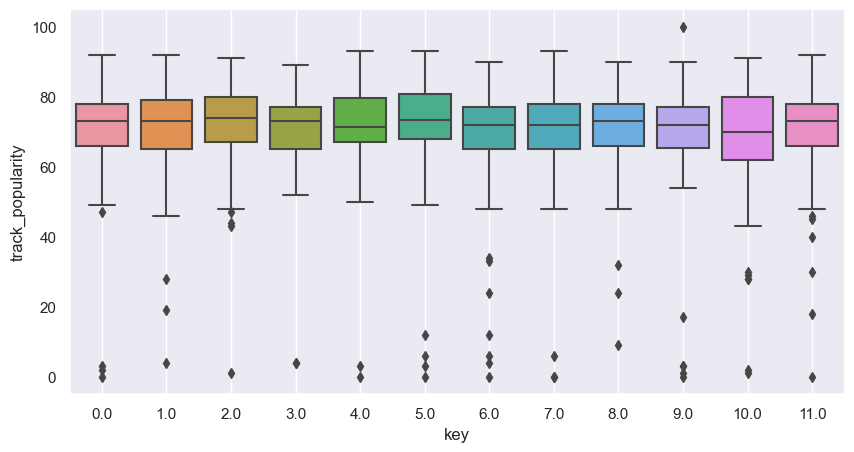

In [15]:
#boxplot to analyze distribution of track popularity across different musical keys 
fig,ax=plt.subplots(figsize=(10,5))
min_popularity=0    #consider only songs w/ a popularity score above or greater to threshold
sns.boxplot(x='key',y='track_popularity',data=df_songs.loc[df_songs.track_popularity>=min_popularity,:],ax=ax)
ax.grid()

# no obvious correlation between key and track_popularity

In [16]:
df_songs = pd.get_dummies(df_songs, columns=['key'], drop_first=True)


In [17]:
df_songs.columns

Index(['year', 'track_name', 'track_popularity', 'album', 'artist_name',
       'artist_genres', 'artist_popularity', 'danceability', 'energy',
       'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness',
       'liveness', 'valence', 'tempo', 'duration_ms', 'genre_pop',
       'genre_hip-hop', 'genre_rap', 'genre_dance', 'genre_rock',
       'genre_contemporary', 'genre_r&b', 'genre_urban', 'genre_trap',
       'genre_house', 'key_1.0', 'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0',
       'key_6.0', 'key_7.0', 'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0'],
      dtype='object')

### Target Variable

In [18]:
median_popularity = df_songs['track_popularity'].median()

df_songs['popularity_target'] = (df_songs['track_popularity'] > median_popularity).astype(int)

df_songs

,year,track_name,track_popularity,album,artist_name,artist_genres,artist_popularity,danceability,energy,loudness,...,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,popularity_target
0,2009,Love Story,81,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.617,0.741,59.0,...,0,0,0,0,0,0,0,0,0,1
1,2009,You Belong With Me,77,Fearless (Big Machine Radio Release Special),Taylor Swift,['pop'],100,0.687,0.745,64.0,...,0,0,0,1,0,0,0,0,0,1
2,2010,Back To December,68,Speak Now,Taylor Swift,['pop'],100,0.529,0.670,66.0,...,0,0,0,0,0,0,0,0,0,0
3,2010,Mine,66,Speak Now,Taylor Swift,['pop'],100,0.624,0.757,46.0,...,0,0,0,0,1,0,0,0,0,0
4,2010,Today Was A Fairytale,53,Today Was A Fairytale,Taylor Swift,['pop'],100,0.491,0.703,65.0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2295,2000,Back Here,52,Sooner Or Later,BBMAK,['boy band'],35,0.624,0.945,49.0,...,0,0,0,0,1,0,0,0,0,0
2296,2001,Do You Really Like It? - Radio Edit,57,Do You Really Like It? (Remixes),DJ Pied Piper & The Masters Of Ceremonies,['uk garage'],35,0.847,0.877,73.0,...,0,0,0,0,0,0,0,0,0,0
2297,2002,Kiss Kiss,55,Footprints,Holly Valance,['australian pop'; 'bubblegum dance'; 'europop...,34,0.705,0.717,69.0,...,0,1,0,0,0,0,0,0,0,0
2298,2003,Sweet Dreams My LA Ex - Radio Edit,48,Funky Dory,Rachel Stevens,['bubblegum dance'; 'europop'; 'talent show'],31,0.852,0.865,55.0,...,0,0,0,0,0,0,0,0,0,0


## Drop Variables

In [19]:
# artist name
# Track_name
# year
# album
# artist_genre

In [20]:
# drop columns that are not useful for the model and the target variable (track_popularity)
df_songs_vars=df_songs.dropna().drop(['track_name',
                                      'artist_name',
                                      'artist_genres',
                                      'album',
                                      'track_popularity',
                                      'track_popularity'],axis=1)
df_songs_vars.columns


Index(['year', 'artist_popularity', 'danceability', 'energy', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'duration_ms', 'genre_pop', 'genre_hip-hop',
       'genre_rap', 'genre_dance', 'genre_rock', 'genre_contemporary',
       'genre_r&b', 'genre_urban', 'genre_trap', 'genre_house', 'key_1.0',
       'key_2.0', 'key_3.0', 'key_4.0', 'key_5.0', 'key_6.0', 'key_7.0',
       'key_8.0', 'key_9.0', 'key_10.0', 'key_11.0', 'popularity_target'],
      dtype='object')

# Models

## Train/Test split

In [21]:
df_songs_vars['year'] = df_songs_vars['year'].astype(int)
df_songs_vars['mode'] = df_songs_vars['mode'].astype(int)


In [22]:
X_train, X_test, y_train, y_test = train_test_split(df_songs_vars[[col for col in df_songs_vars.columns if col!='popularity_target']], 
                                                    df_songs_vars['popularity_target'], test_size=0.2, random_state=99, stratify=df_songs_vars['popularity_target'])

In [23]:
from sklearn.preprocessing import StandardScaler


# drop columns that are not useful for the model and the target variable (track_popularity) 
# look later at the artist_genres to see if it can be used


#target_popularity=df_songs.track_popularity.quantile(0.5) # example 50%, 75% or 90% quantile

#min_popularity=0
#df_songs=df_songs.loc[df_songs.track_popularity>=min_popularity,:]


#y=df_songs.dropna().loc[:,'track_popularity']>target_popularity
#X=df_songs.dropna().drop(['track_name','artist_name','artist_genres','album','track_popularity'],axis=1)



scaler=StandardScaler()

X_train_scaled=pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns)
X_test_scaled=pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

df_train=pd.concat([X_train_scaled,y_train],axis=1).dropna()
df_train

,year,artist_popularity,danceability,energy,loudness,mode,speechiness,acousticness,instrumentalness,liveness,...,key_3.0,key_4.0,key_5.0,key_6.0,key_7.0,key_8.0,key_9.0,key_10.0,key_11.0,popularity_target
0,-1.082017,-1.274936,0.376208,0.239141,-0.308000,-1.209458,2.429660,1.922745,-0.163840,-0.798478,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,1.0
1,1.058329,0.736012,0.340497,-0.284112,0.139068,0.826817,-0.580352,-0.301252,-0.163840,-0.309151,...,-0.184637,-0.244925,-0.317850,3.373567,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,1.0
2,-0.011844,0.149486,-1.530751,1.249142,-1.202137,-1.209458,-0.537368,-0.770720,-0.163617,-1.010545,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,-0.296422,-0.289791,3.815174,-0.31785,0.0
3,0.293920,1.154960,-0.109460,1.115287,-1.457604,-1.209458,0.151464,0.674082,-0.163840,-0.743775,...,-0.184637,-0.244925,3.146141,-0.296422,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,0.0
4,-0.929135,-1.861462,-0.116602,0.500768,0.330669,-1.209458,-0.757665,-0.647338,-0.163840,-0.898142,...,-0.184637,-0.244925,-0.317850,3.373567,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1814,-0.776253,-0.353251,2.168892,-0.606582,0.650004,-1.209458,0.108479,-0.649305,-0.163780,-1.009796,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,0.0
1815,0.446801,0.317065,-0.359435,1.206552,-1.074403,0.826817,-0.073131,-0.014158,-0.163318,-1.155919,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,-0.296422,3.450768,-0.262111,-0.31785,1.0
1816,-1.693545,-0.939778,0.154801,0.299985,0.713871,0.826817,-0.670620,1.077193,-0.051192,-0.863672,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,3.373567,-0.289791,-0.262111,-0.31785,1.0
1817,-0.164726,0.149486,-0.259445,-0.856040,1.097072,0.826817,-0.821067,0.167734,-0.148323,0.927282,...,-0.184637,-0.244925,-0.317850,-0.296422,-0.340411,-0.296422,-0.289791,-0.262111,-0.31785,0.0


## X_train, X_test, y_train, y_test,       
## for algorithms that requires scaling: X_train_scaled, X_test_scaled

## Decision Trees

In [24]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, roc_auc_score

param_grid = {'max_depth': range(1,16)} # 

songs_tree = DecisionTreeClassifier(random_state=42,
                                    )

songs_tree_pruned_cv = GridSearchCV(songs_tree, 
                   param_grid,
                   scoring='accuracy',
                   cv=5 , n_jobs=1, verbose=1)

songs_tree_pruned_cv.fit(X_train,y_train);

Fitting 5 folds for each of 15 candidates, totalling 75 fits


In [25]:
print("Best parameters set found on development set:")
print()
print(songs_tree_pruned_cv.best_params_)
print()
print("Grid scores on development set:")
print()
means = songs_tree_pruned_cv.cv_results_['mean_test_score']
stds = songs_tree_pruned_cv.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, songs_tree_pruned_cv.cv_results_['params']):
    print("Accuracy = %0.3f (+/%0.03f) for %r" % (mean, std * 2, params))

Best parameters set found on development set:

{'max_depth': 3}

Grid scores on development set:

Accuracy = 0.659 (+/0.021) for {'max_depth': 1}
Accuracy = 0.657 (+/0.021) for {'max_depth': 2}
Accuracy = 0.682 (+/0.032) for {'max_depth': 3}
Accuracy = 0.663 (+/0.036) for {'max_depth': 4}
Accuracy = 0.654 (+/0.039) for {'max_depth': 5}
Accuracy = 0.652 (+/0.060) for {'max_depth': 6}
Accuracy = 0.640 (+/0.032) for {'max_depth': 7}
Accuracy = 0.633 (+/0.037) for {'max_depth': 8}
Accuracy = 0.638 (+/0.030) for {'max_depth': 9}
Accuracy = 0.630 (+/0.041) for {'max_depth': 10}
Accuracy = 0.630 (+/0.056) for {'max_depth': 11}
Accuracy = 0.610 (+/0.059) for {'max_depth': 12}
Accuracy = 0.621 (+/0.040) for {'max_depth': 13}
Accuracy = 0.624 (+/0.071) for {'max_depth': 14}
Accuracy = 0.610 (+/0.065) for {'max_depth': 15}


In [26]:
songs_tree_pruned = DecisionTreeClassifier(random_state=42, max_depth=3, criterion="entropy")
tree=songs_tree_pruned.fit(X_train, y_train)
predtrain=songs_tree_pruned.predict(X_train)
predictions = songs_tree_pruned.predict(X_test)
accDTGrid = accuracy_score(y_test, predictions)
print("Accuracy of Train set = {0:.2%}".format(accuracy_score(y_train, predtrain)))
print("Accuracy of Test set = {0:.2%}".format(accuracy_score(y_test, predictions)))

Accuracy of Train set = 69.07%
Accuracy of Test set = 69.01%


### ROC - AUC Decision Trees

AUC Score: 0.7670445691132929


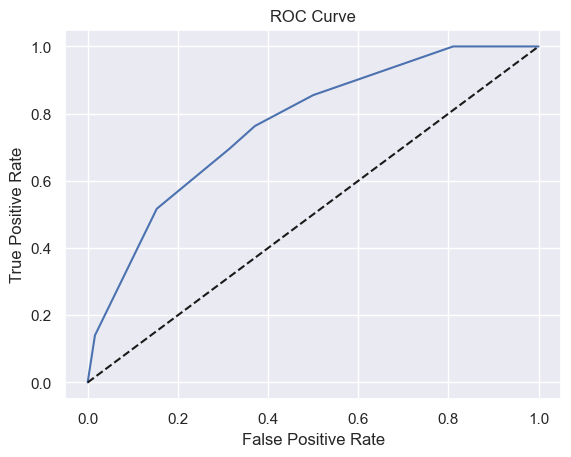

In [27]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba = songs_tree_pruned.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')

# Calculate the AUC score
auc_score_dt = roc_auc_score(y_test, y_pred_proba)
print('AUC Score:', auc_score_dt)


## Boosting

In [266]:
#!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

# Create DMatrix for Cross Validation: an optimized & compressed matrix used to store the datasets optimally in xgboost
# It is a requirement


# data_dmatrix = xgb.DMatrix(data=df_songs_vars[[col for col in df_songs_vars.columns if col!='popularity_target']],
#                            label=df_songs_vars['popularity_target'], enable_categorical=True)

xbg_class = xgb.XGBClassifier(tree_method='gpu_hist')


# apply gridsearch
import scipy.stats as stats

# Define the parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1, 0.5 , 0.6 , 0.7],
    'max_depth': [3, 5, 7],
    'n_estimators': [10,30,50,100, 200, 300]
}

# Create the GridSearchCV object
grid_search_boosting = GridSearchCV(estimator=xbg_class, param_grid=param_grid, cv=5,verbose=True,scoring='roc_auc'
                           )

# Fit the grid search to the data
grid_search_boosting.fit(X_train, y_train)

# Get the best parameters and best score
best_params = grid_search_boosting.best_params_
best_score = grid_search_boosting.best_score_

# Print the best parameters and best score
print("Best Parameters:", best_params)
print("Best Score:", best_score)





Fitting 5 folds for each of 90 candidates, totalling 450 fits


Best Parameters: {'learning_rate': 0.01, 'max_depth': 3, 'n_estimators': 300}
Best Score: 0.7564399703274802


In [30]:
import xgboost as xgb

# Train the XGBoost model
model = xgb.XGBClassifier(learning_rate=0.01,max_depth=3,n_estimators=300,random_state=123)
model.fit(X_train, y_train)

# Make predictions on the test set
y_pred_proba = model.predict_proba(X_test)[:, 1]
y_pred = (y_pred_proba >=0.46).astype(int)
# Calculate accuracy
accXGB = accuracy_score(y_test, y_pred)
print("Accuracy:", accXGB)



Accuracy: 0.7076923076923077


### ROC - AUC Boosting

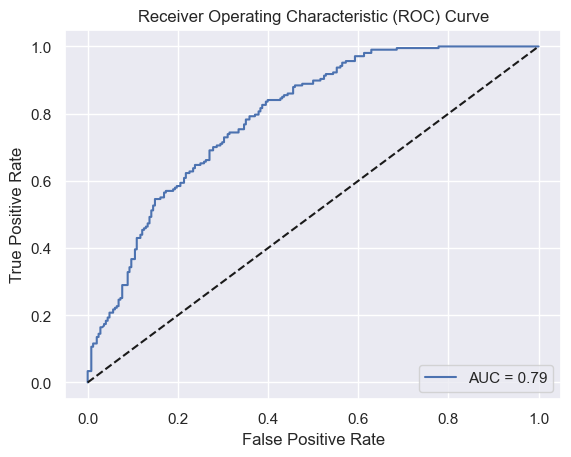

In [32]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score_boosting = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score_boosting:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [33]:
auc_score_boosting

0.791403693314633

## KNN 

In [70]:
#kNN classifier, predictions on both training and testing sets
from sklearn.neighbors import KNeighborsClassifier

knn=KNeighborsClassifier(n_neighbors=10,metric='euclidean',weights='distance',leaf_size=1)

knn.fit(X_train_scaled,y_train)

y_pred=knn.predict(X_test_scaled)
y_pred_train=knn.predict(X_train_scaled)

print(accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred))
print(confusion_matrix( y_test,y_pred))
print(classification_report(y_test,y_pred))
print(roc_auc_score(y_test,knn.predict_proba(X_test_scaled)[:, 1]))

auc_score_knn =roc_auc_score(y_test,knn.predict_proba(X_test_scaled)[:, 1])

1.0 0.676923076923077
[[171  77]
 [ 70 137]]
              precision    recall  f1-score   support

           0       0.71      0.69      0.70       248
           1       0.64      0.66      0.65       207

    accuracy                           0.68       455
   macro avg       0.67      0.68      0.68       455
weighted avg       0.68      0.68      0.68       455

0.7437275985663082


In [47]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_neighbors': list(range(11, 20,1)),
    'metric': ['euclidean'],
    'weights': [ 'distance'],
}
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=5, scoring='roc_auc', verbose=1)
  
# fitting the model for grid search
grid_search=grid.fit(X_train_scaled, y_train)

print(grid_search.best_params_)

knn=grid_search.best_estimator_

y_pred=knn.predict(X_test_scaled)
y_pred_train=knn.predict(X_train_scaled)

print(accuracy_score(y_train,y_pred_train),accuracy_score(y_test,y_pred))
print(confusion_matrix( y_test,y_pred))
print(classification_report(y_test,y_pred))
print(grid_search.best_score_)
print(roc_auc_score(y_test,knn.predict_proba(X_test_scaled)[:, 1]))

knn=KNeighborsClassifier(**grid_search.best_params_)
knn.fit(X_train_scaled,y_train)
accKNN = accuracy_score(y_test,y_pred)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
{'metric': 'euclidean', 'n_neighbors': 19, 'weights': 'distance'}
1.0 0.7120879120879121
[[183  65]
 [ 66 141]]
              precision    recall  f1-score   support

           0       0.73      0.74      0.74       248
           1       0.68      0.68      0.68       207

    accuracy                           0.71       455
   macro avg       0.71      0.71      0.71       455
weighted avg       0.71      0.71      0.71       455

0.6901084282309686
0.7729468599033817


### ROC KNN

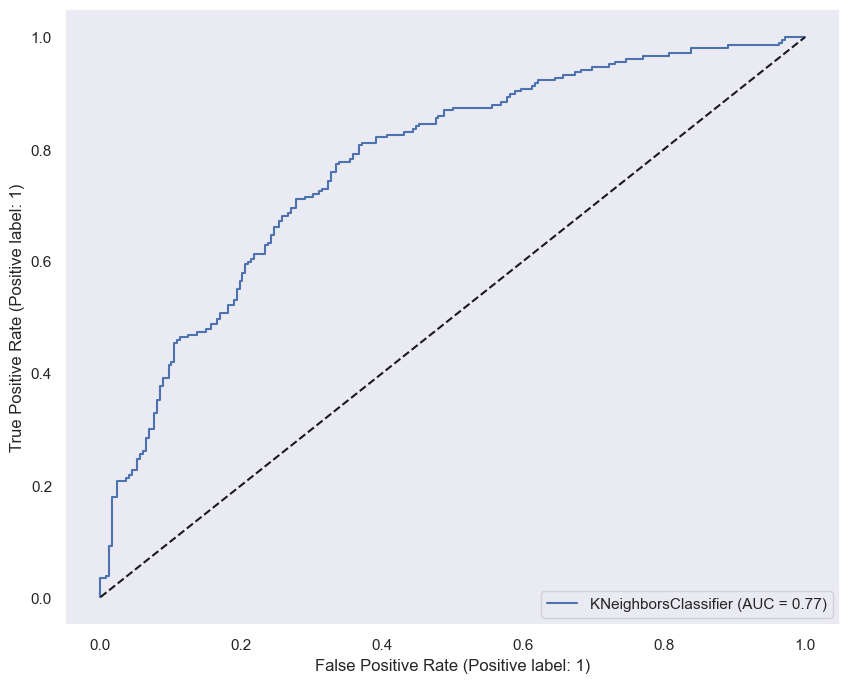

In [48]:
#display ROC curve 
from sklearn.metrics import RocCurveDisplay
fig,ax=plt.subplots(1,1,figsize=(10,8))

roc=RocCurveDisplay.from_estimator(knn, X_test_scaled, y_test,ax=ax)
plt.plot([0, 1], [0, 1], 'k--')
ax.grid()




## Random Forest

In [49]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

rf_classifier = RandomForestClassifier(n_estimators=500, oob_score=True, max_features=8)
rf_classifier.fit(X_train, y_train)
y_pred_test = rf_classifier.predict(X_test)

print("Train Accuracy score:  {0:.2%}".format(rf_classifier.score(X_train,y_train)))
print("Accuracy of Test set = {0:.2%}".format(accuracy_score(y_test, y_pred_test)))
print("Accuracy for OOB: {0:.2%}".format(rf_classifier.oob_score_))

Train Accuracy score:  100.00%
Accuracy of Test set = 74.51%
Accuracy for OOB: 68.46%


Grid Search

In [201]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, accuracy_score

acc="accuracy" # our metric for Grid Searching
total_samples = len(X_train)
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],
    'min_samples_leaf': [1, 2, 4, 8],
    'max_features' : [5,6,7,8,9,10,15,20,25,30],
}


RFGrid = GridSearchCV(rf_classifier, param_grid=param_grid, cv=5, scoring=acc, verbose=1) 
RFGrid.fit(X_train, y_train)
print("Best params: ", RFGrid.best_params_)

rf_classifier2 = RandomForestClassifier(n_estimators=RFGrid.best_params_["n_estimators"],
                                        oob_score=True,
                                        max_features=RFGrid.best_params_["max_features"],
                                        min_samples_leaf=RFGrid.best_params_["min_samples_leaf"],random_state=123)

rf_classifier2.fit(X_train, y_train)
y_pred_test = rf_classifier2.predict(X_test)

accRFGrid=rf_classifier2.oob_score_
print("Accuracy OOB set - RF with Grid Searching: {0:.2%}".format(accRFGrid))
print("Train Accuracy score:  {0:.2%}".format(rf_classifier2.score(X_train,y_train)))
print("Accuracy of Test set = {0:.2%}".format(accuracy_score(y_test, y_pred_test)))

Fitting 5 folds for each of 150 candidates, totalling 750 fits
Best params:  {'max_features': 9, 'min_samples_leaf': 18, 'n_estimators': 100}
Accuracy OOB set - RF with Grid Searching: 67.75%
Train Accuracy score:  77.91%
Accuracy of Test set = 73.41%


In [50]:
rf_classifier2 = RandomForestClassifier(n_estimators=100,
                                        oob_score=True,
                                        max_features=9,
                                        min_samples_leaf=4,
                                        random_state=123)

rf_classifier2.fit(X_train, y_train)
y_pred_test = rf_classifier2.predict(X_test)

accRFGrid=rf_classifier2.oob_score_
print("Accuracy OOB set - RF with Grid Searching: {0:.2%}".format(accRFGrid))
print("Train Accuracy score:  {0:.2%}".format(rf_classifier2.score(X_train,y_train)))
print("Accuracy of Test set = {0:.2%}".format(accuracy_score(y_test, y_pred_test)))

Accuracy OOB set - RF with Grid Searching: 68.46%
Train Accuracy score:  95.22%
Accuracy of Test set = 72.97%


### ROC - AUC Random Forest

In [51]:
from sklearn.metrics import roc_auc_score

pred_prob = rf_classifier2.predict_proba(X_test) #probability of being in both groups
prob_malign = [p[1] for p in pred_prob] #probability of being in the malign group
auc_score_rf = roc_auc_score(y_test, prob_malign)
print("AUC score:  {0:.2%}".format(auc_score_rf))

AUC score:  81.13%


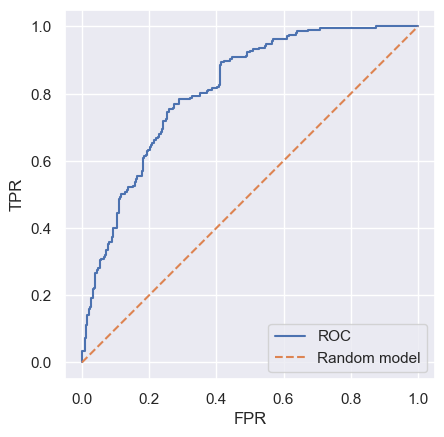

In [52]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prob_malign, pos_label=1)
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr, label="ROC")
ax.plot([0, 1], [0, 1],linestyle='--', label="Random model") 
#plt.text(fpr[ix], tpr[ix], f'Threshold: {optimal_threshold:.2f}', ha='right', va='bottom')
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_box_aspect(1)
ax.legend()
plt.show()

In [257]:
# import numpy as np
# y_pred_class = (np.array(prob_malign) >= 0.475).astype(int)
# accRFGrid = accuracy_score(y_test, y_pred_class)
# accRFGrid

0.7428571428571429

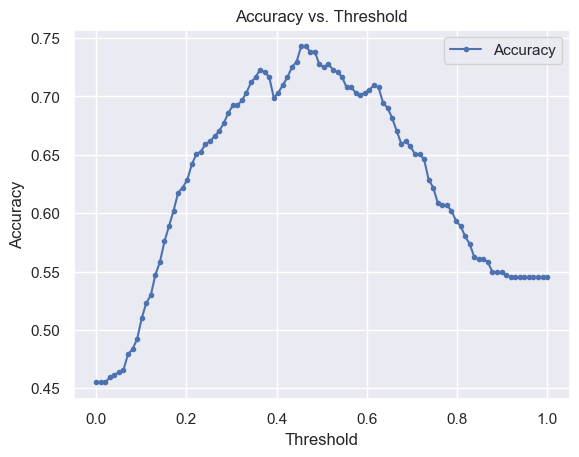

Maximum Accuracy: 0.743 at Threshold: 0.455


In [53]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score

# Assuming y_pred_prob and y_test are already defined in your environment
# Generate a range of thresholds from 0 to 1
thresholds = np.linspace(0, 1, 100)

# Initialize a list to store accuracy for each threshold
accuracy_scores = []

# Calculate accuracy for each threshold
for threshold in thresholds:
    y_pred_class = (prob_malign >= threshold).astype(int)
    accuracy = accuracy_score(y_test, y_pred_class)
    accuracy_scores.append(accuracy)

# Plot accuracy vs. threshold
plt.plot(thresholds, accuracy_scores, marker='.', label='Accuracy')
plt.xlabel('Threshold')
plt.ylabel('Accuracy')
plt.title('Accuracy vs. Threshold')
plt.legend()
plt.grid(True)
plt.show()


# Find the maximum accuracy and the corresponding threshold
max_accuracy = max(accuracy_scores)
optimal_threshold = thresholds[accuracy_scores.index(max_accuracy)]

print(f'Maximum Accuracy: {max_accuracy:.3f} at Threshold: {optimal_threshold:.3f}')

## Bagging 

In [54]:
model = RandomForestClassifier(n_estimators=500, oob_score=True) 
model.fit(X_train, y_train)
acc="accuracy"

Grid Search

In [71]:
total_samples = len(X_train)
param_grid = {'min_samples_leaf': [int(total_samples * 0.01), int(total_samples * 0.03), int(total_samples * 0.05)], 'max_depth': range(1, 16)}


#param_grid = {'min_samples_leaf' :[3,4,5,6,7,10,12],'max_depth': range(1,16)}

BaggGrid = GridSearchCV(model, param_grid=param_grid, cv=5, scoring=acc, verbose=1) 
BaggGrid.fit(X_train,y_train)
print("Best param: ", BaggGrid.best_params_)


Fitting 5 folds for each of 45 candidates, totalling 225 fits
Best param:  {'max_depth': 15, 'min_samples_leaf': 54}


In [57]:
model = RandomForestClassifier(n_estimators = 200, oob_score = True,
                               min_samples_leaf = 54,
                               max_depth= 15, random_state=123)
model.fit(X_train,y_train)
accBaggGrid=model.oob_score_
print("Accuracy OOB set - Bagging with Grid Searching: {0:.2%}".format(accBaggGrid))

Accuracy OOB set - Bagging with Grid Searching: 67.75%


In [58]:
predictions = model.predict(X_test)
accBaggGrid=accuracy_score(y_test, predictions)
print("Accuracy of Test set (pruned) = {0:.2%}".format(accBaggGrid))

Accuracy of Test set (pruned) = 72.09%


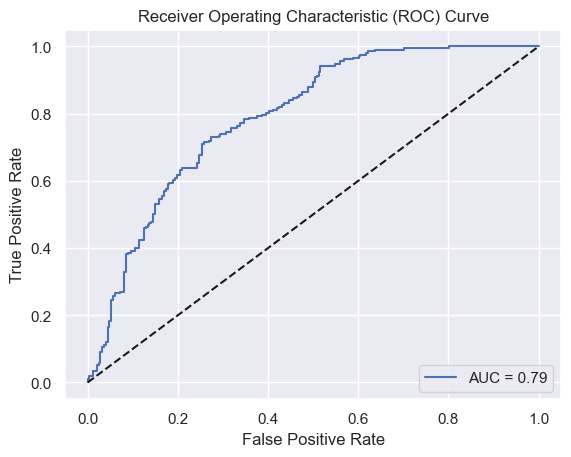

In [60]:
from sklearn.metrics import roc_curve, roc_auc_score

# Predict probabilities for the test data
y_pred_proba = model.predict_proba(X_test)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score_bagging = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score_bagging:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Logistic Regression

In [76]:
#target_popularity=df_songs.track_popularity.quantile(0.5) # example 50%, 75% or 90% quantile

# let the outliers stay for now
#df_songs=df_songs.loc[df_songs.track_popularity>36,:]


#y=df_songs.dropna().loc[:,'track_popularity']>target_popularity
#X=df_songs.dropna().drop(['track_name','artist_name','artist_genres','album','track_popularity'],axis=1)



#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=99, stratify=y)

#scaler=StandardScaler()

#X_train_scaled=pd.DataFrame(data=scaler.fit_transform(X_train),columns=X_train.columns)
#X_test_scaled=pd.DataFrame(data=scaler.transform(X_test),columns=X_test.columns)

#df_train=pd.concat([X_train_scaled,y_train],axis=1).rename(columns={'track_popularity':'target'})

In [61]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=10000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=10000)

In [62]:
accTrainLR = model.score(X_train_scaled,y_train)
accLR =model.score(X_test_scaled, y_test)
print(accTrainLR)
print(accLR)

0.6967032967032967
0.7076923076923077


In [63]:
y_pred=model.predict(X_test_scaled)
print(confusion_matrix( y_test,y_pred))
print(classification_report(y_test,y_pred))

[[187  61]
 [ 72 135]]
              precision    recall  f1-score   support

           0       0.72      0.75      0.74       248
           1       0.69      0.65      0.67       207

    accuracy                           0.71       455
   macro avg       0.71      0.70      0.70       455
weighted avg       0.71      0.71      0.71       455



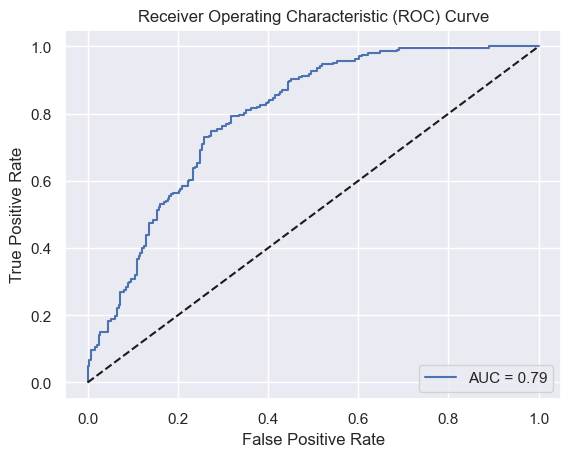

In [65]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
y_pred_proba = model.predict_proba(X_test_scaled)[:, 1]

# Calculate the false positive rate, true positive rate, and thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)

# Calculate the AUC score
auc_score_lr = roc_auc_score(y_test, y_pred_proba)

# Plot the ROC curve
plt.plot(fpr, tpr, label=f'AUC = {auc_score_lr:.2f}')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Naives Bayes

In [66]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()

nb.fit(X_train_scaled, y_train)

y_pred = nb.predict(X_test_scaled)
accNB= accuracy_score(y_test, y_pred)

print(accuracy_score(y_test, y_pred))

print(confusion_matrix(y_test, y_pred))

print(classification_report(y_test, y_pred))

0.6967032967032967
[[155  93]
 [ 45 162]]
              precision    recall  f1-score   support

           0       0.78      0.62      0.69       248
           1       0.64      0.78      0.70       207

    accuracy                           0.70       455
   macro avg       0.71      0.70      0.70       455
weighted avg       0.71      0.70      0.70       455



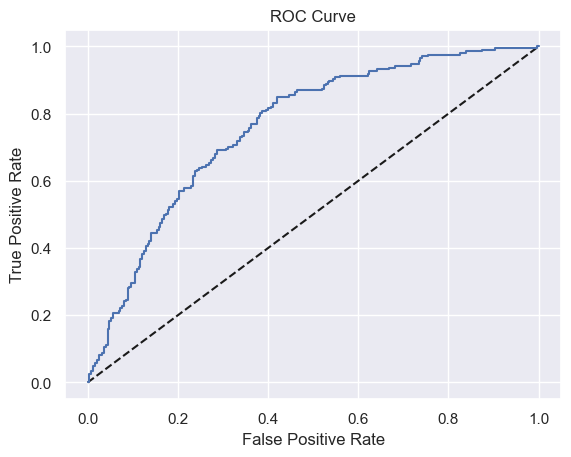

AUC: 0.7589216144615865


In [67]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# Compute predicted probabilities: y_pred_prob
y_pred_prob = nb.predict_proba(X_test_scaled)[:,1]

# Generate ROC curve values: fpr, tpr, thresholds
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

# Plot ROC curve
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

auc_score_nb = roc_auc_score(y_test, y_pred_prob)
# Compute and print AUC score
print("AUC: {}".format(   auc_score_nb ))

## Comparison Between Models

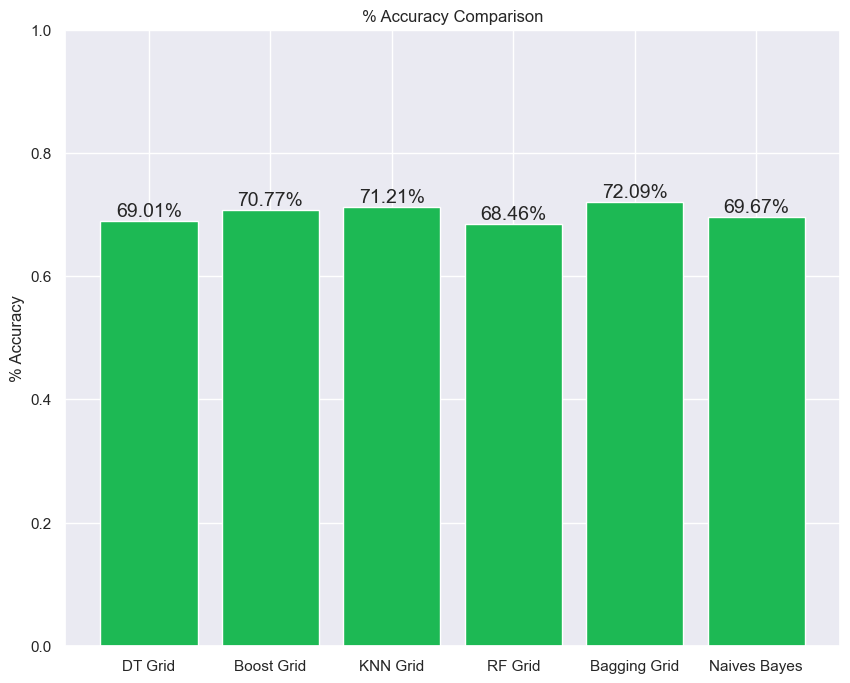

In [68]:
categ = ['DT Grid', 'Boost Grid', 'KNN Grid', 'RF Grid', 'Bagging Grid',
         #'LR', 
         'Naives Bayes' ]
values = [accDTGrid, accXGB, accKNN, 
          accRFGrid, 
          accBaggGrid,
          #accLR, 
          accNB ]
colors = ['darkblue', 'red', 'orange', 'darkgreen'] 

plt.figure(figsize=(10,8))
plt.bar(categ, values, color='#1db954')
plt.ylim(0, 1)

plt.xlabel('')
plt.ylabel('% Accuracy')
plt.title('% Accuracy Comparison')

for i, v in enumerate(values):
    plt.text(i, v+0.03, "{0:.2%}".format(v) , ha='center', va='top', fontsize=14)
    
plt.show()

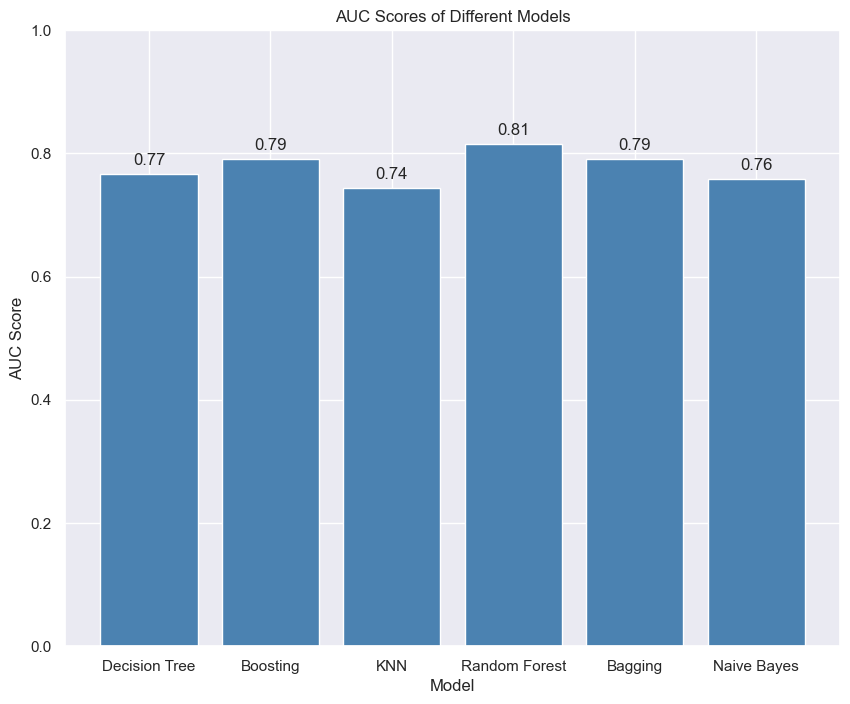

In [101]:
import matplotlib.pyplot as plt
model_names = ['Decision Tree',
 'Boosting',
 'KNN',
 'Random Forest',
 'Bagging',
 #'Logistic Regression',
 'Naive Bayes']

auc_scores = [auc_score_dt,
              auc_score_boosting,
              auc_score_knn,
              auc_score_rf,
              auc_score_bagging,
              #auc_score_lr,
              auc_score_nb]

# Plot the AUC scores
plt.figure(figsize=(10, 8))
plt.bar(model_names, auc_scores, color='#4B82B1')
plt.ylim(0, 1)
plt.xlabel('Model')
plt.ylabel('AUC Score')
plt.title('AUC Scores of Different Models')

# Add the AUC scores as text on top of each bar
for i, v in enumerate(auc_scores):
    plt.text(i, v+0.01, "{:.2f}".format(v), ha='center', va='bottom', fontsize=12)  # Adjust va='bottom' to move the text above the bar

plt.show()



# Final Model

### RF with grid search

* `max_features` = 9
* `min_samples_leaf` = 4
* `n_estimators` = 100

In [77]:
print("Best params: ", "RFGrid.best_params_")

rf_classifier2 = RandomForestClassifier(n_estimators=100,
                                        oob_score=True,
                                        max_features=9,
                                        min_samples_leaf=4, random_state=42
                                        )

rf_classifier2.fit(X_train, y_train)

Best params:  RFGrid.best_params_


RandomForestClassifier(max_features=9, min_samples_leaf=4, oob_score=True,
                       random_state=42)

### Predictions

In [78]:
y_pred_test = rf_classifier2.predict(X_test)
pred_prob = rf_classifier2.predict_proba(X_test)[:,1] #probability of being in both groups
auc_score_rf = roc_auc_score(y_test, pred_prob)
print("AUC score:  {0:.2%}".format(auc_score_rf))

AUC score:  81.48%


## ROC - AUC

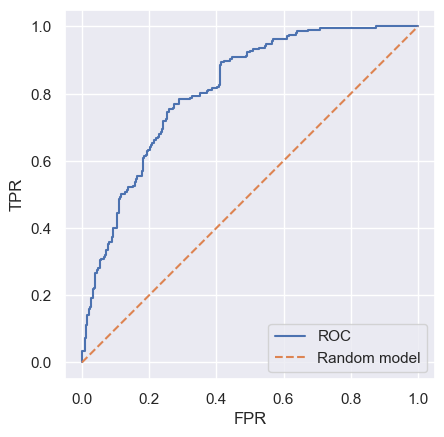

In [79]:
from sklearn.metrics import roc_curve

fpr, tpr, thresholds = roc_curve(y_test, prob_malign, pos_label=1)
fig, ax = plt.subplots(1, 1)
ax.plot(fpr, tpr, label="ROC")
ax.plot([0, 1], [0, 1],linestyle='--', label="Random model") 
ax.set_xlabel("FPR")
ax.set_ylabel("TPR")
ax.set_box_aspect(1)
ax.legend()
plt.show()

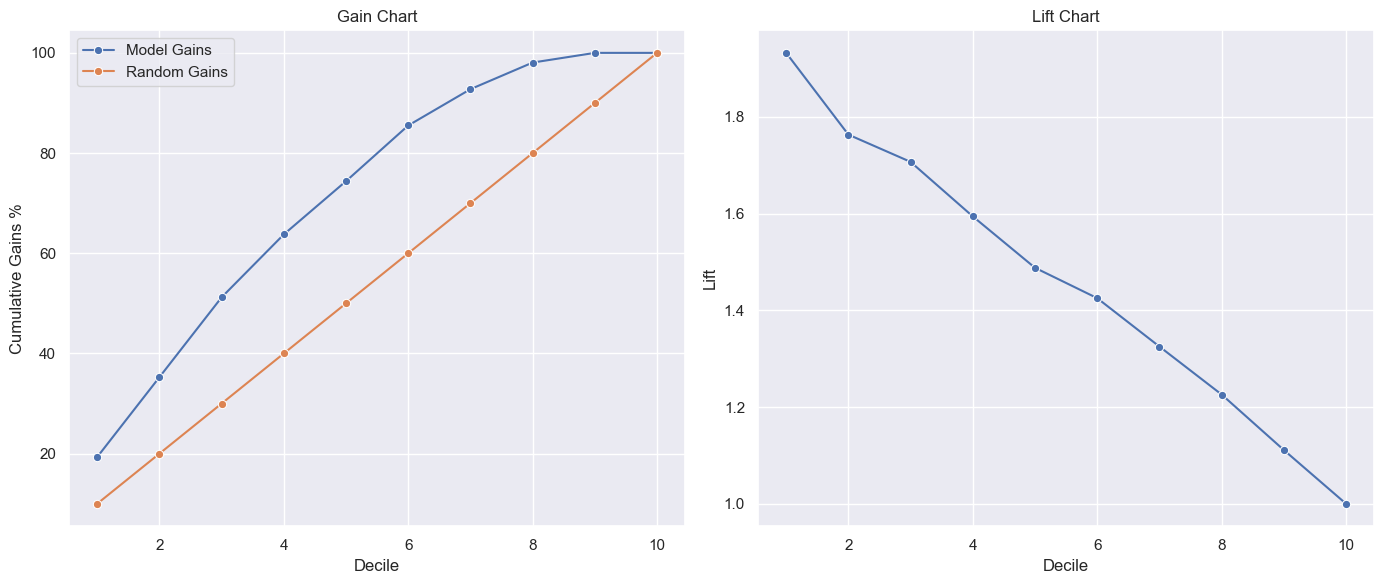

In [104]:
y_probs = rf_classifier2.predict_proba(X_test)[:, 1]  # Assuming binary classification and you're interested in the second class
# Create a DataFrame with true labels and predicted probabilities
df = pd.DataFrame({'True': y_test, 'Prob': y_probs})

# Create a DataFrame with true labels and predicted probabilities
import pandas as pd
import numpy as np

df = pd.DataFrame({'True': y_test, 'Prob': y_probs})

# Sort the DataFrame by probabilities in descending order
df_sorted = df.sort_values('Prob', ascending=False).reset_index(drop=True)

# Assign deciles
df_sorted['Decile'] = pd.qcut(df_sorted.index, 10, labels=False) + 1


# Compute cumulative gains by decile
decile_gains = df_sorted.groupby('Decile')['True'].sum().cumsum()

# Compute the total number of positives
total_positives = df_sorted['True'].sum()

# Compute random gains as if the outcomes were random
random_gains = np.linspace(0, total_positives, 11)

# Compute lift by comparing the model's performance to the random baseline
lift = decile_gains / (total_positives / 10 * np.arange(1, 11))


import matplotlib.pyplot as plt
import seaborn as sns

# Setting up the plots
fig, ax = plt.subplots(1, 2, figsize=(14, 6))

# Gain Chart
sns.lineplot(x=np.arange(1, 11), y=decile_gains / total_positives * 100, ax=ax[0], marker='o', label='Model Gains')
sns.lineplot(x=np.arange(1, 11), y=np.arange(10, 110, 10), ax=ax[0], marker='o', label='Random Gains')
ax[0].set_title('Gain Chart')
ax[0].set_xlabel('Decile')
ax[0].set_ylabel('Cumulative Gains %')

# Lift Chart
sns.lineplot(x=np.arange(1, 11), y=lift, ax=ax[1], marker='o')
ax[1].set_title('Lift Chart')
ax[1].set_xlabel('Decile')
ax[1].set_ylabel('Lift')

plt.tight_layout()
plt.show()


## Feature importance

Text(0.5, 1.0, 'Global Feature Importance - Built-in Method')

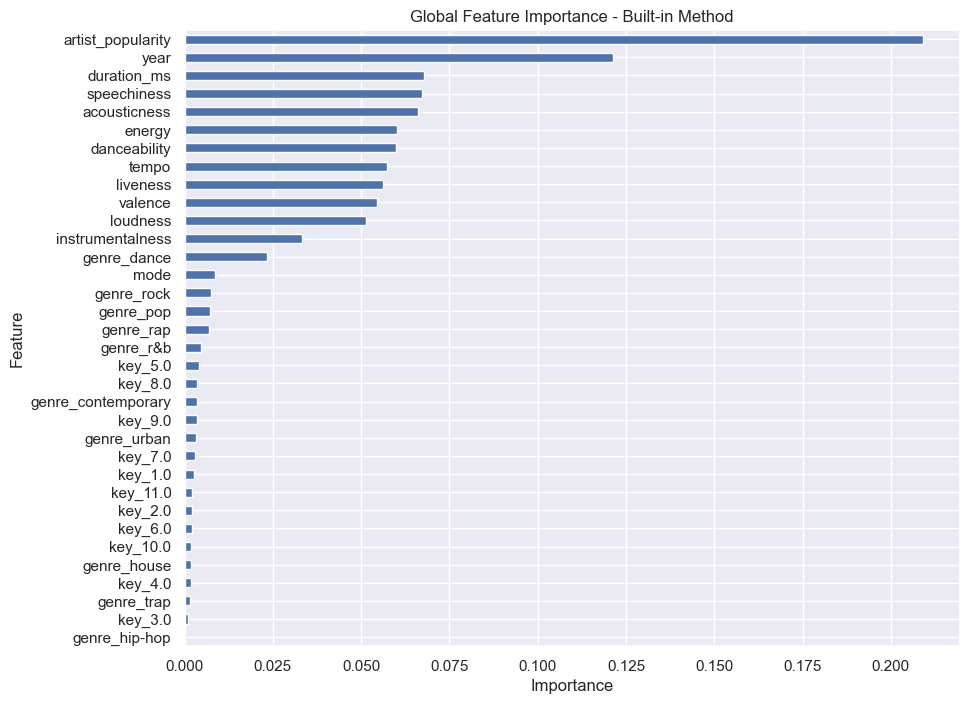

In [80]:
global_importances = pd.Series(rf_classifier2.feature_importances_, index=X_train.columns)
global_importances.sort_values(ascending=True, inplace=True)

plt.figure(figsize=(10, 8))  # Adjust the width and height as per your preference
global_importances.plot.barh(color='b')
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Global Feature Importance - Built-in Method")

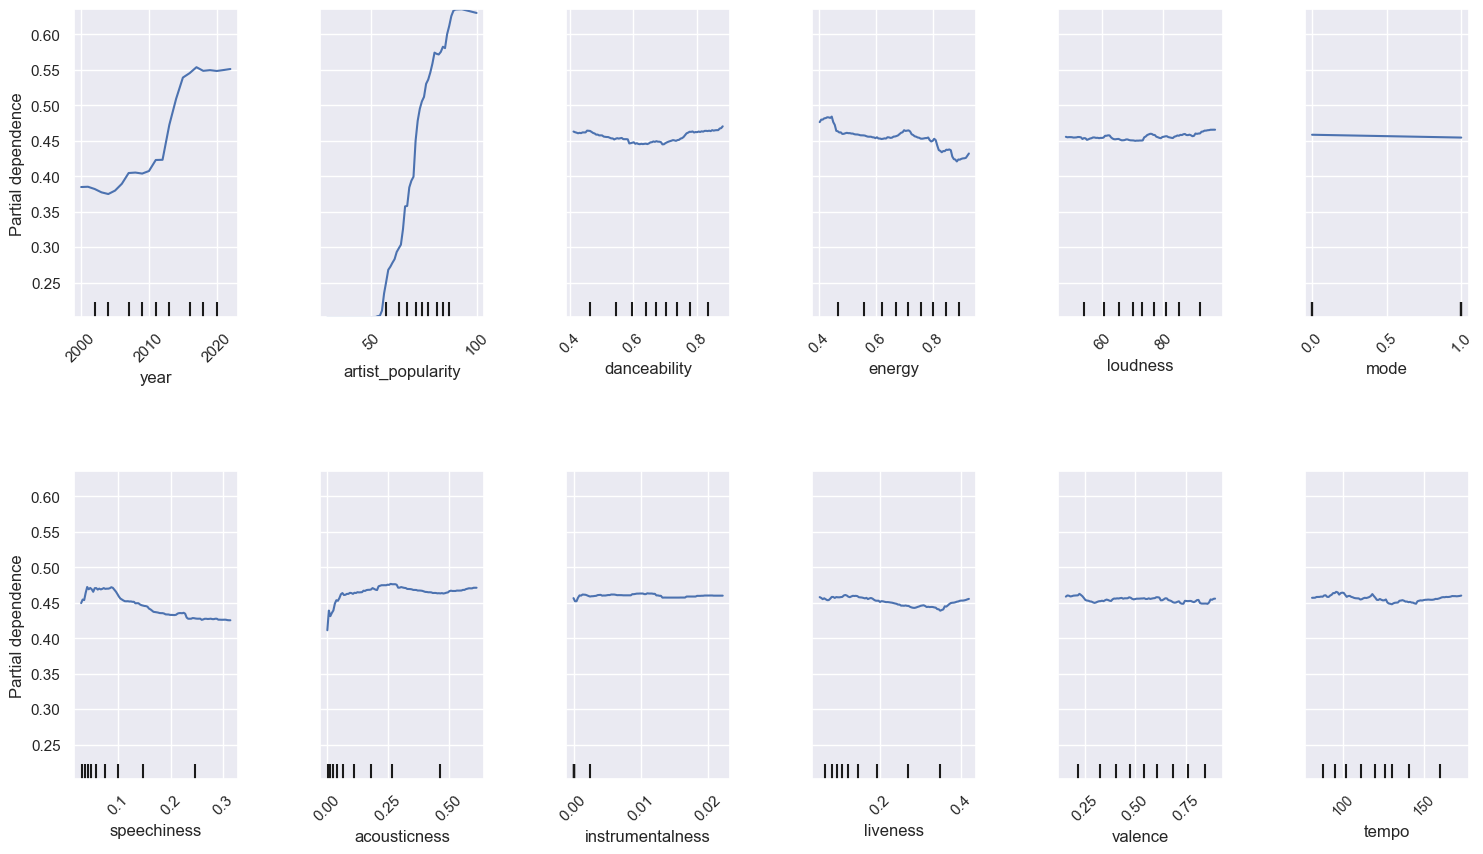

In [81]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay

# Assuming rf_classifier2 and X_train are defined earlier in your code
fig, axes = plt.subplots(nrows=2, ncols=6, figsize=(18, 10))  # Adjust the figure size

# Generate partial dependence plots
display = PartialDependenceDisplay.from_estimator(rf_classifier2, X_train, range(12), ax=axes)

# Adjust the layout and spacing of subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)  # Adjust spacing between subplots

# Rotate x-axis labels for better readability
for ax in axes.flat:
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis labels

# Adjust font sizes
plt.xticks(fontsize=10)  # Adjust x-axis tick labels font size
plt.yticks(fontsize=10)  # Adjust y-axis tick labels font size
plt.xlabel_fontsize=12  # Adjust x-axis label font size
plt.ylabel_fontsize=12  # Adjust y-axis label font size

# Show the plots
plt.show()

Most important variables are:
1. `artist_popularity`
1. `year`
1. `acousticness`
1. `duration_ms`
1. `speechiness`
1. `energy`
1. `tempo`

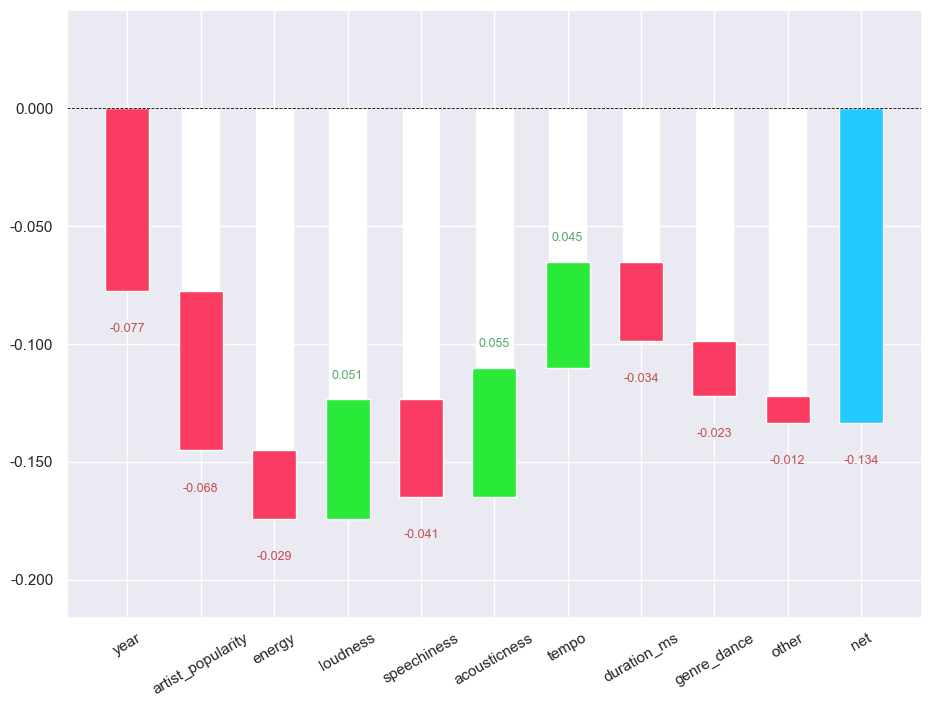

In [82]:
import waterfall_chart
from treeinterpreter import treeinterpreter as ti


row = X_test.values[None,1]
prediction, bias, contributions = ti.predict(rf_classifier2, row)
prediction, bias, contributions


contributions_2 = [contributions[0][i][0] for i in range(len(contributions[0]))]
colnames = X_train.columns[0:-1].values #all but target variable

myplot = waterfall_chart.plot(colnames, contributions_2[:-1], threshold=0.2, formatting='{:,.3f}') # Adjust the dimensions of contributions_2
plt.gcf().set_size_inches(10, 8)
plt.show()

In [87]:
import shap
# Fits the explainer
explainer = shap.Explainer(rf_classifier2.predict, X_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(X_test)



Permutation explainer: 456it [02:01,  3.44it/s]                         


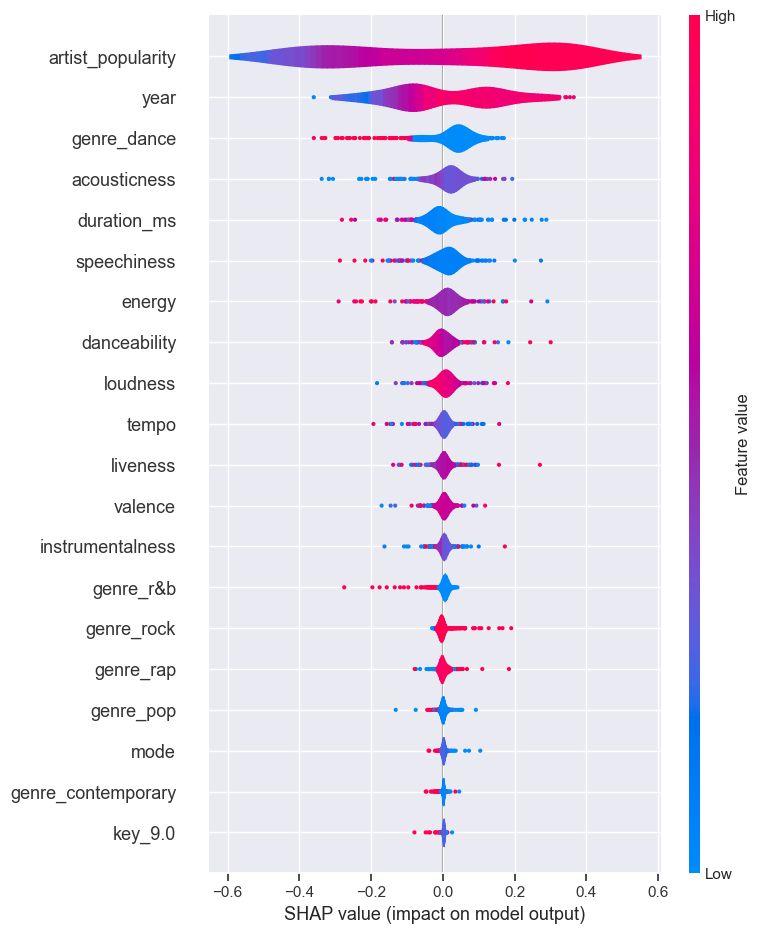

In [88]:
shap.summary_plot(shap_values,plot_type='violin')

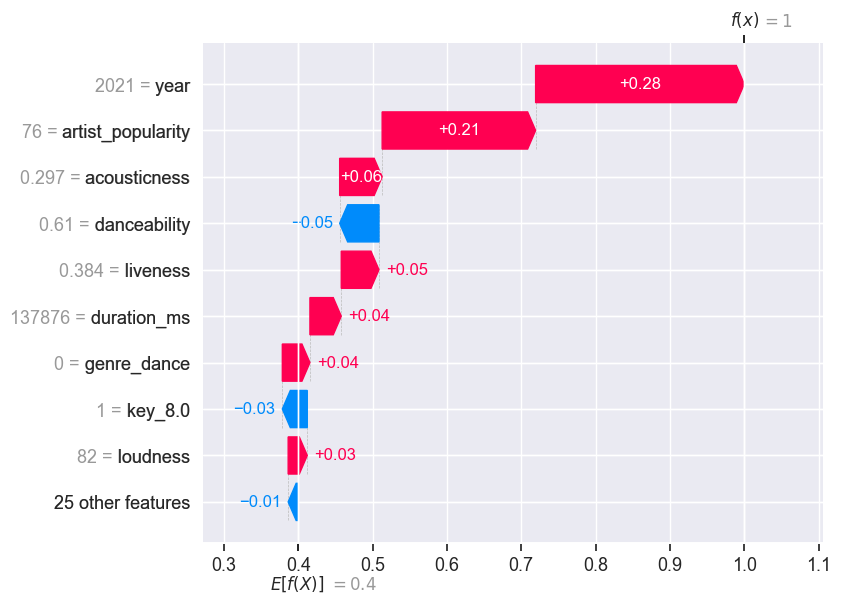

In [89]:
shap.plots.waterfall(shap_values[0])

# EDA of predictions

In [90]:
# df_eda_predictions = 

df_eda_predictions = pd.concat([
    X_test.reset_index(),
    pd.DataFrame(pred_prob,columns=['probability']).reset_index()
    ],axis=1 )
# pd.qcut(pred_prob,10,labels=False)+1

In [91]:
# add a quantile from 1 to 10
df_eda_predictions['decile'] = pd.qcut(df_eda_predictions['probability'],10,labels=False)+1

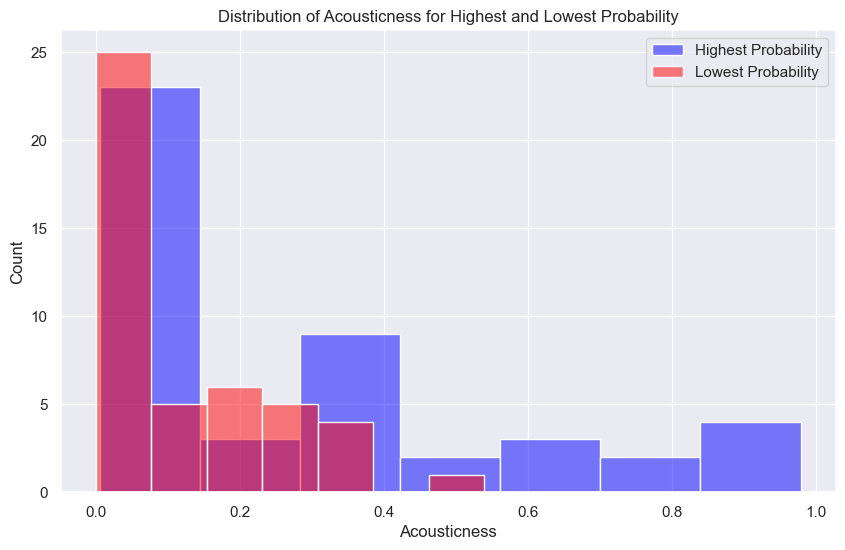

In [95]:
import seaborn as sns
# take the highest Z% and the lowest Z% of probability of popularity
Z = 1
highest_prob = df_eda_predictions[df_eda_predictions['decile'] > 10-Z]
lowest_prob = df_eda_predictions[df_eda_predictions['decile'] <= Z]

# Plot the distribution of acousticness for highest_prob and lowest_prob
plt.figure(figsize=(10, 6))
sns.histplot(data=highest_prob, x='acousticness', label='Highest Probability', color='blue', alpha=0.5)
sns.histplot(data=lowest_prob, x='acousticness', label='Lowest Probability', color='red', alpha=0.5)
plt.xlabel('Acousticness')
plt.ylabel('Count')
plt.title('Distribution of Acousticness for Highest and Lowest Probability')
plt.legend()
plt.show()



### Plot the distributions for the top Z% and the bottom Z%

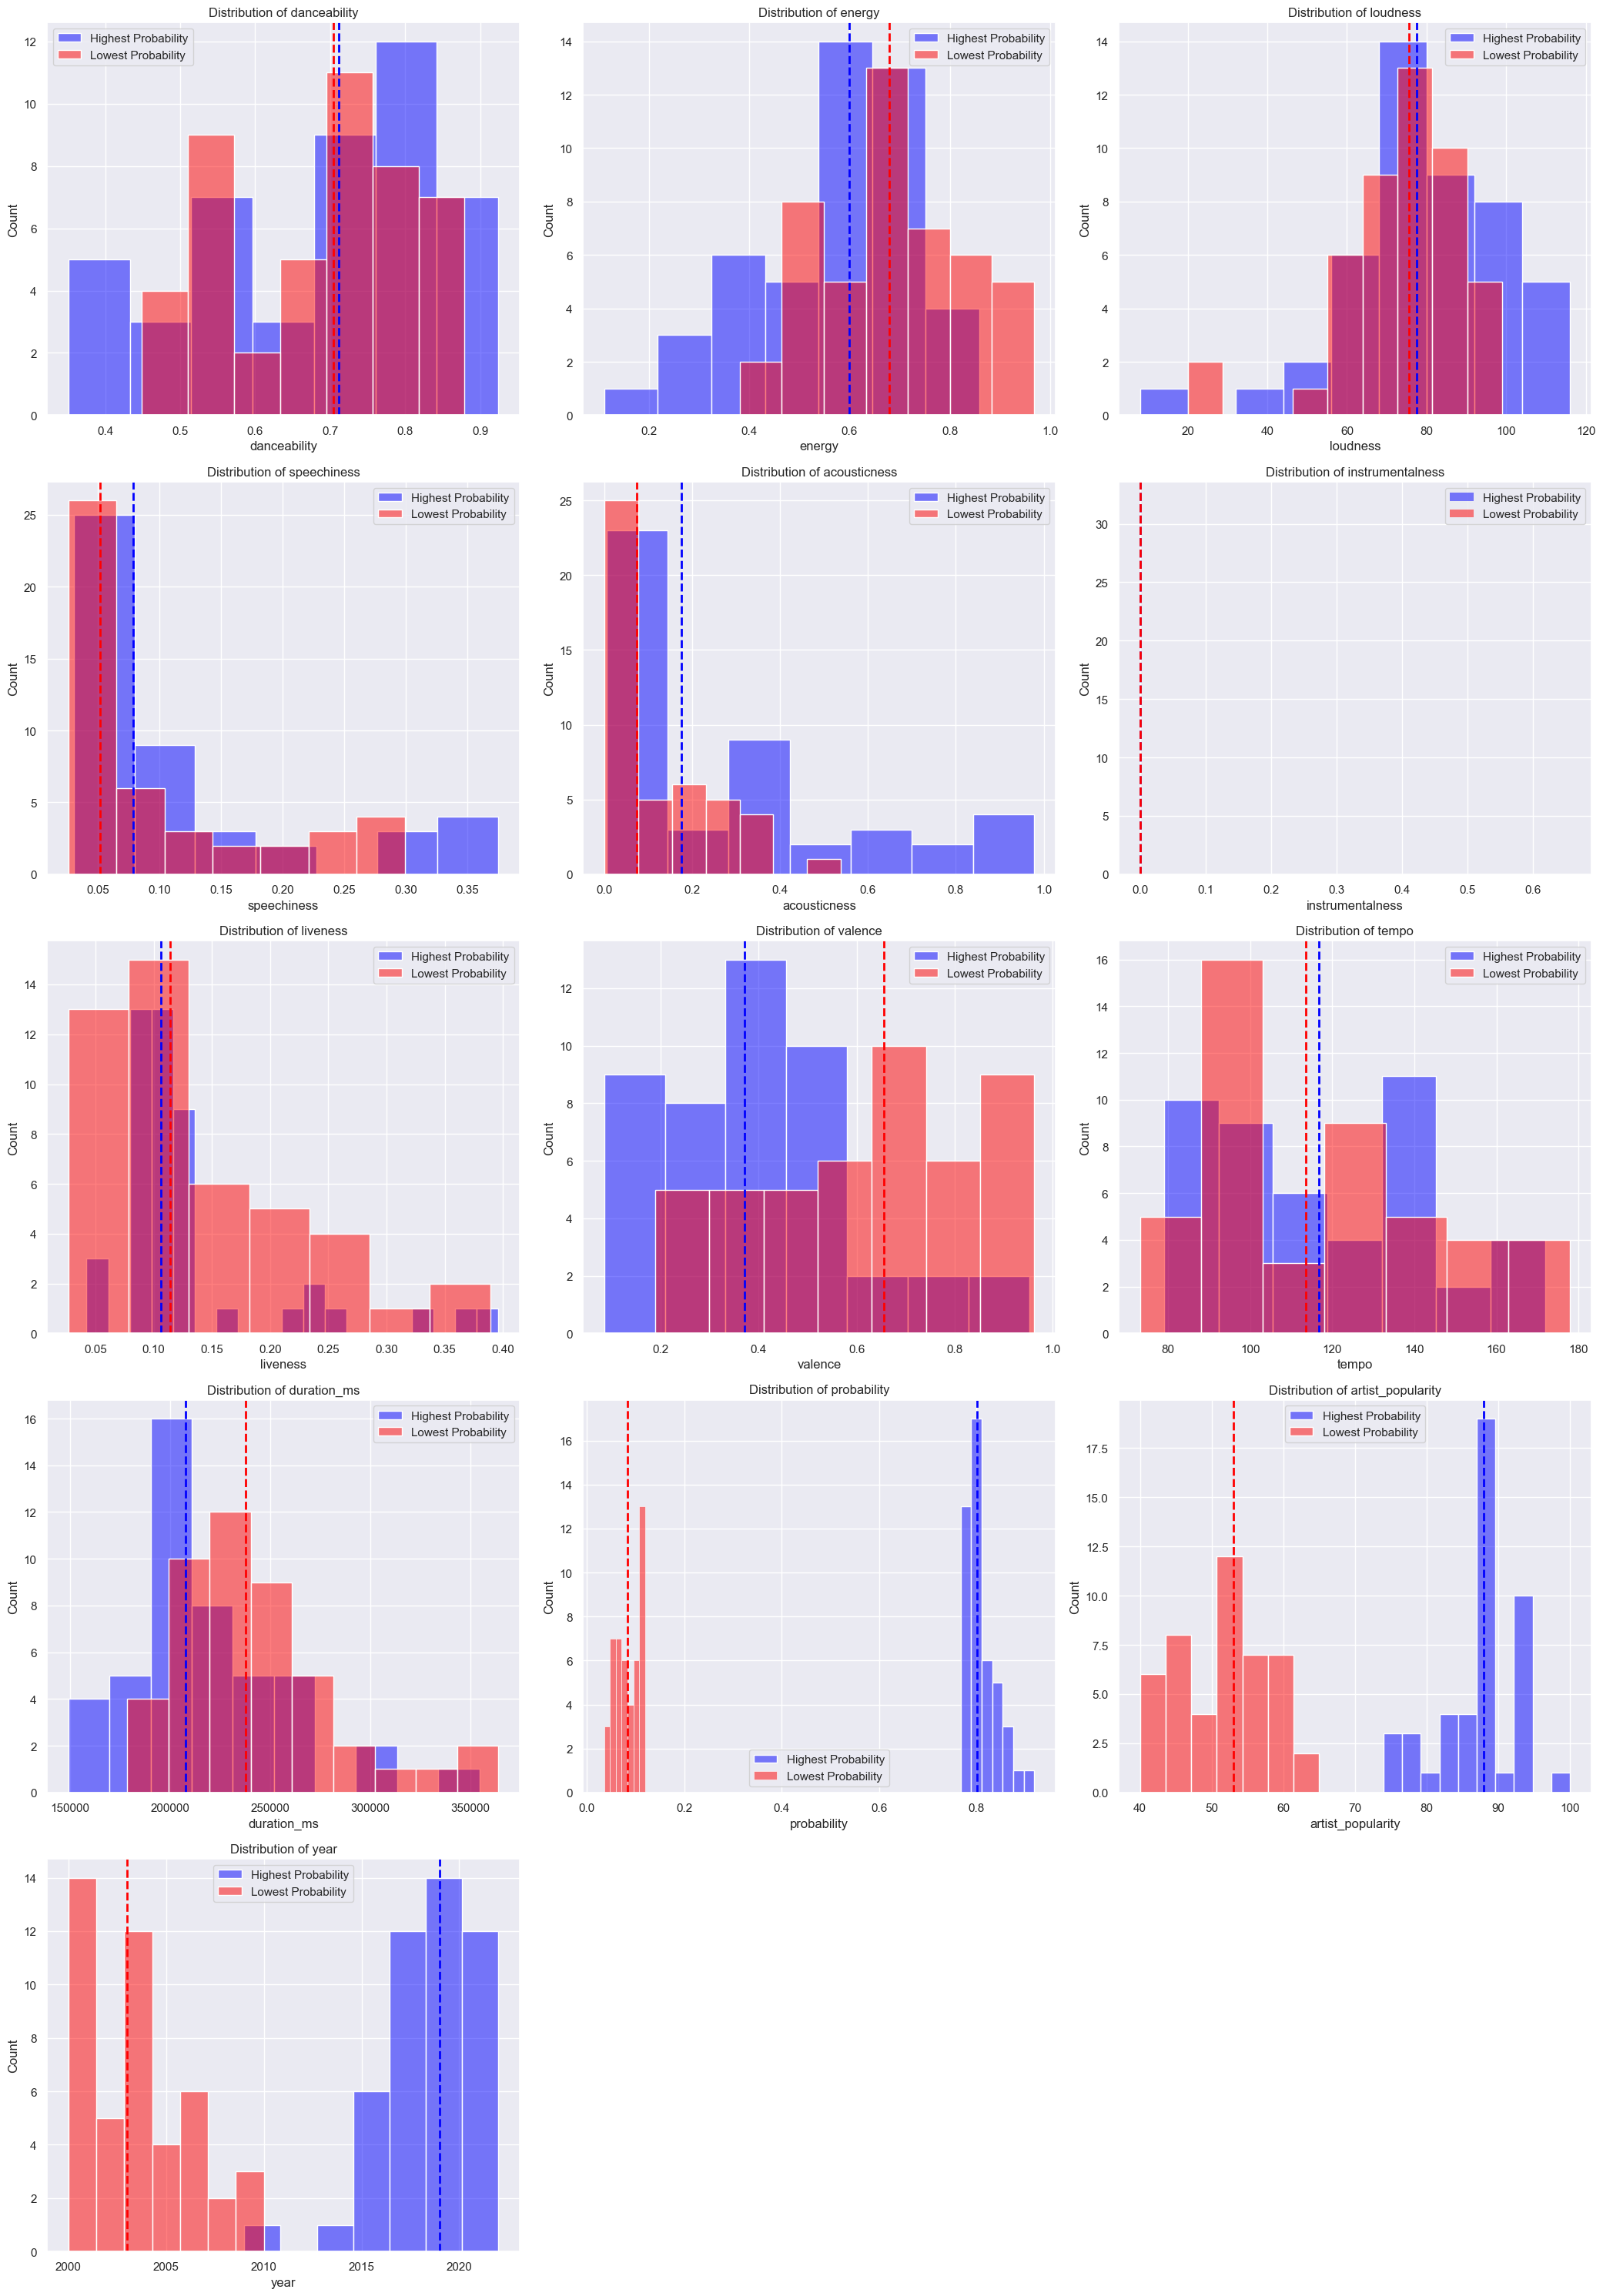

In [96]:

numerical_columns = list(highest_prob.select_dtypes(include=['float64']).columns)
numerical_columns.append('artist_popularity')
numerical_columns.append('year')
binary_columns = [col for col in df_eda_predictions.columns if col.startswith('genre') or col.startswith('key')]



# Create subplots for the numerical columns
# Setting up the matplotlib figure (3 columns per row)
rows = (len(numerical_columns) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(21, 6 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each numerical column
for i, col in enumerate(numerical_columns):
    sns.histplot(highest_prob[col], ax=axes[i], color='blue', alpha=0.5, label='Highest Probability')
    sns.histplot(lowest_prob[col], ax=axes[i], color='red', alpha=0.5, label='Lowest Probability')
    
    # Calculate and plot the mean for the highest_prob group
    mean_highest = highest_prob[col].median()
    axes[i].axvline(mean_highest, color='blue', linestyle='--', linewidth=2)
    
    # Calculate and plot the mean for the lowest_prob group
    mean_lowest = lowest_prob[col].median()
    axes[i].axvline(mean_lowest, color='red', linestyle='--', linewidth=2)
    
    axes[i].set_title(f'Distribution of {col}')
    axes[i].legend()

# Hide any empty subplots if the number of plots is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

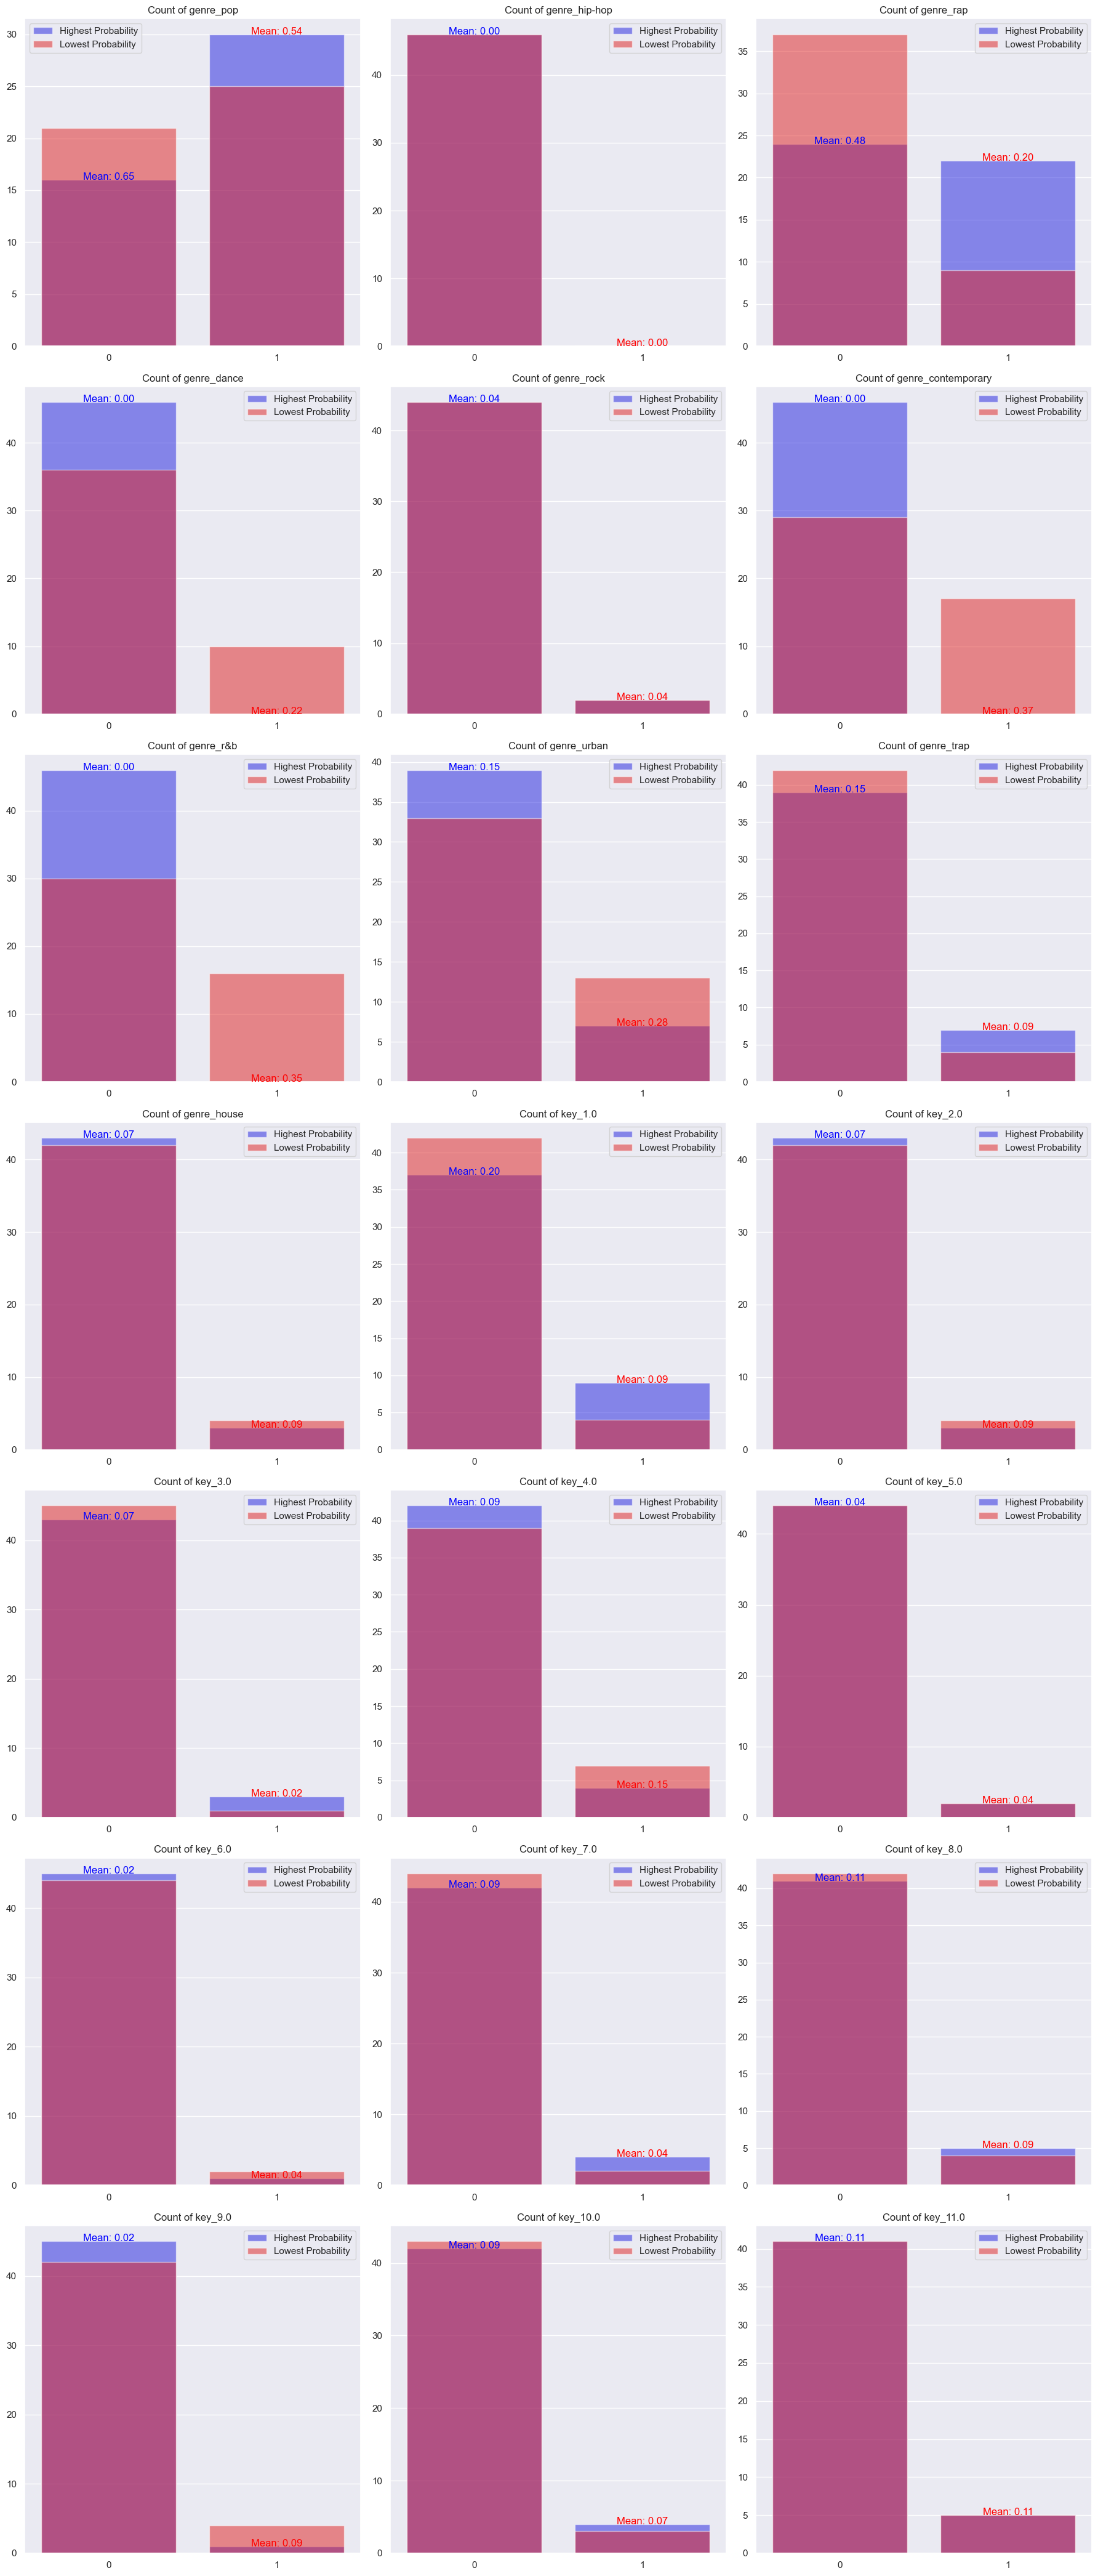

In [97]:
# Create subplots for the binary columns
# Setting up the matplotlib figure (3 columns per row)
rows = (len(binary_columns) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))

# Flatten axes array for easy iteration
axes = axes.flatten()

# Plot each binary column
for i, col in enumerate(binary_columns):
    # Calculate the means
    mean_highest = highest_prob[col].mean()
    mean_lowest = lowest_prob[col].mean()
    
    # Create a bar plot for each category
    sns.barplot(x=[0, 1], y=[(highest_prob[col] == 0).sum(), (highest_prob[col] == 1).sum()], 
                ax=axes[i], alpha=0.5, color='blue', label='Highest Probability')
    sns.barplot(x=[0, 1], y=[(lowest_prob[col] == 0).sum(), (lowest_prob[col] == 1).sum()], 
                ax=axes[i], alpha=0.5, color='red', label='Lowest Probability')

    # Annotate the means
    axes[i].text(0, (highest_prob[col] == 0).sum(), f'Mean: {mean_highest:.2f}', color='blue', ha="center")
    axes[i].text(1, (highest_prob[col] == 1).sum(), f'Mean: {mean_lowest:.2f}', color='red', ha="center")

    axes[i].set_title(f'Count of {col}')
    axes[i].legend()

# Hide any empty subplots if the number of plots is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

# Adjust layout for better viewing
plt.tight_layout()
plt.show()

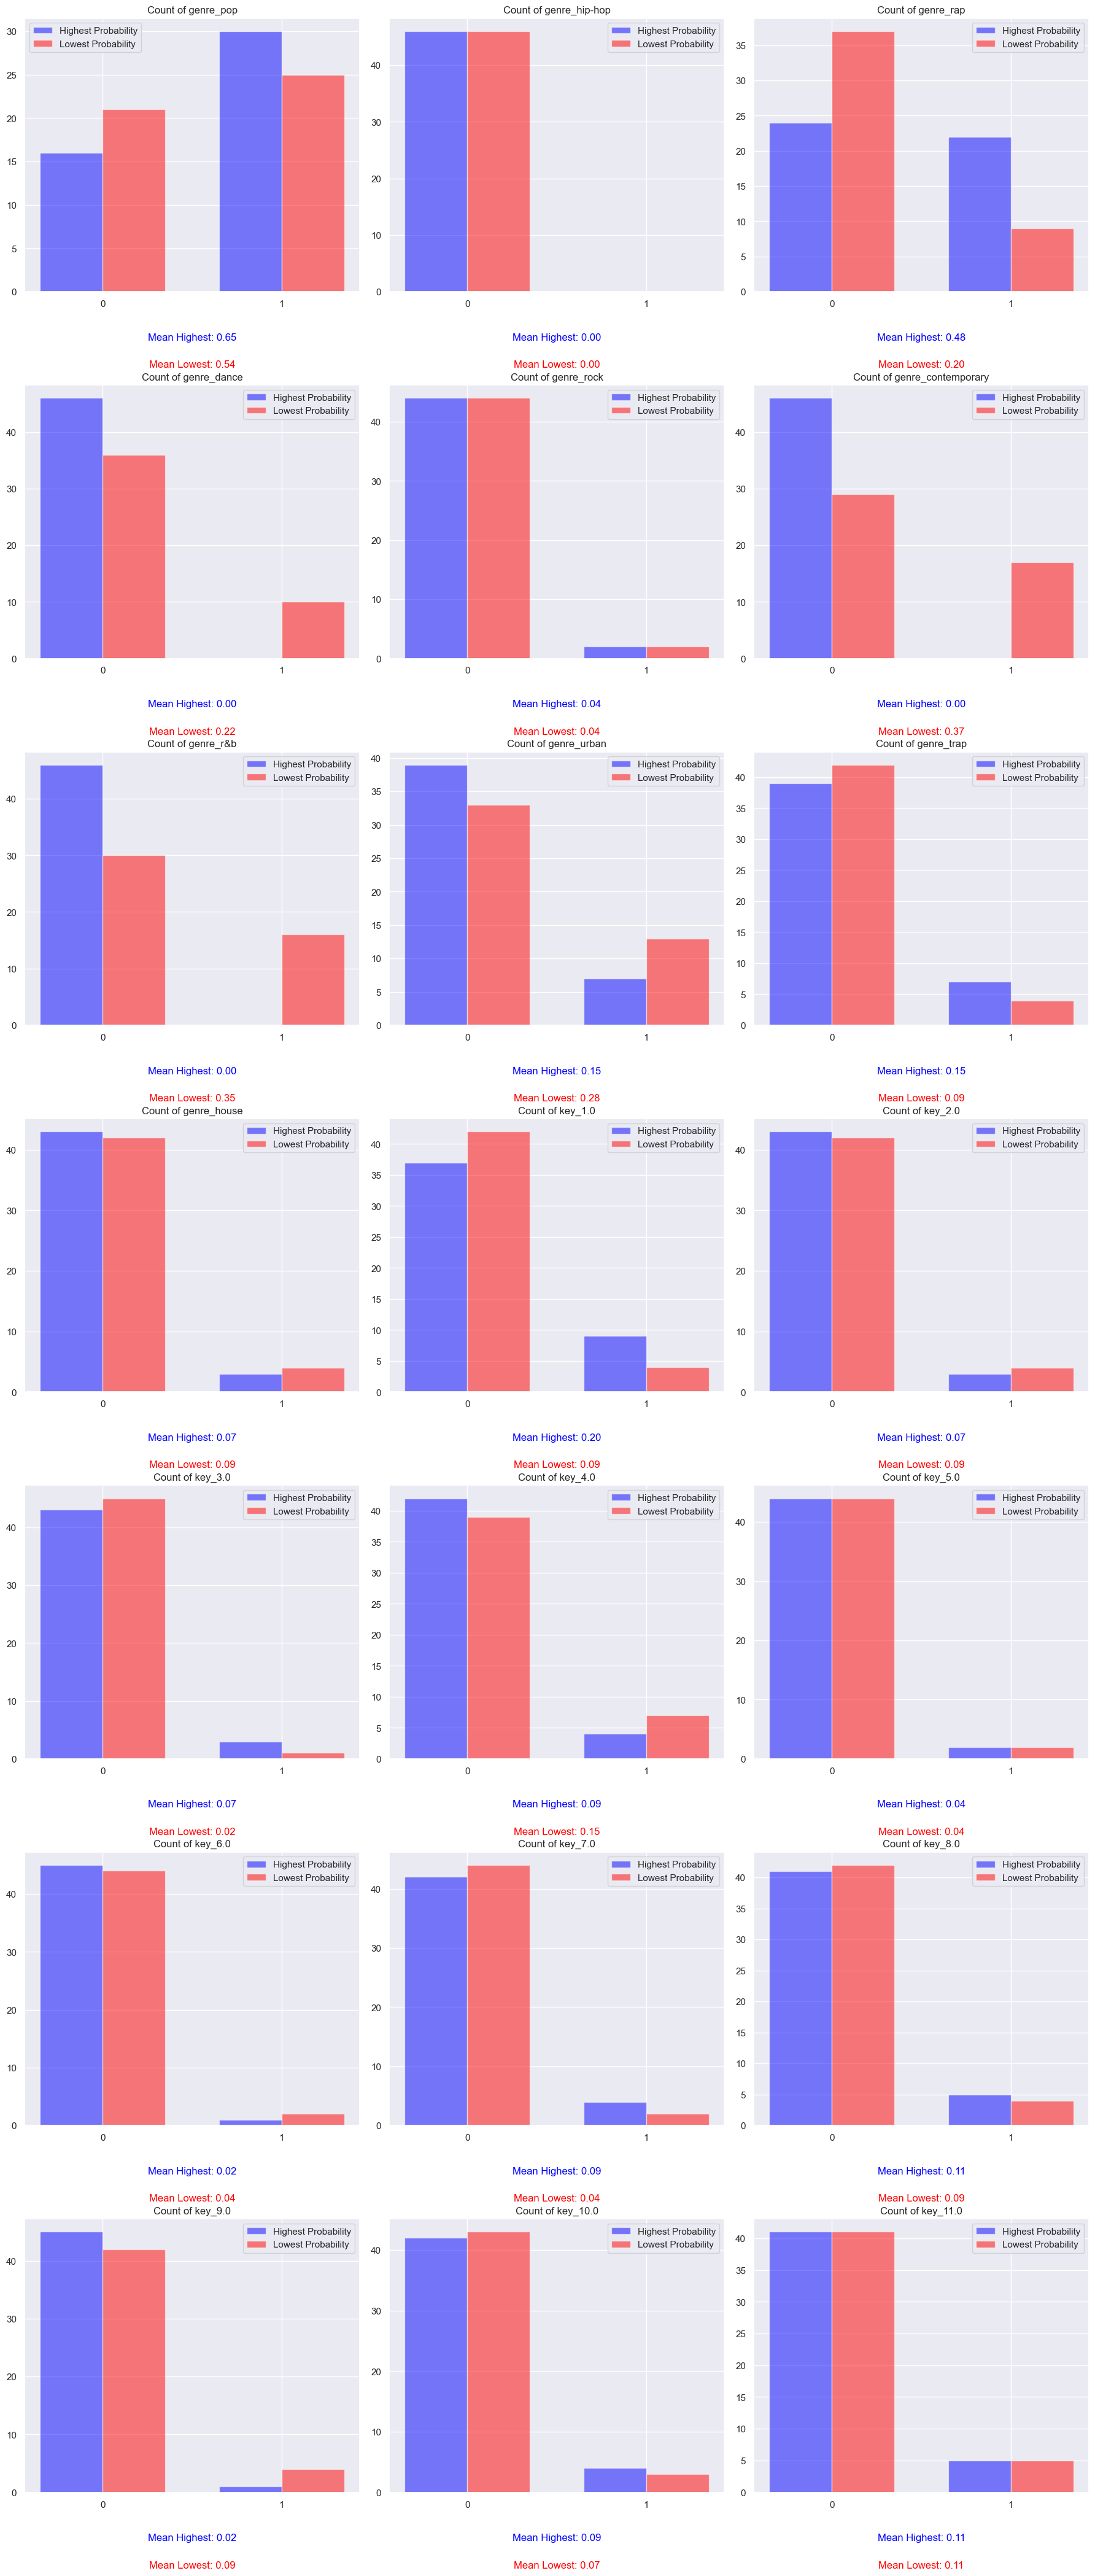

In [100]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# Assuming binary_columns, highest_prob, and lowest_prob are defined
rows = (len(binary_columns) + 2) // 3
fig, axes = plt.subplots(rows, 3, figsize=(18, 6 * rows))
axes = axes.flatten()

bar_width = 0.35  # Width of the bars
opacity = 0.5  # Opacity of the bars

for i, col in enumerate(binary_columns):
    index = np.arange(2)  # Two categories (0 and 1) for binary columns
    bars1 = [(highest_prob[col] == 0).sum(), (highest_prob[col] == 1).sum()]
    bars2 = [(lowest_prob[col] == 0).sum(), (lowest_prob[col] == 1).sum()]
    
    # Plotting bars side by side
    axes[i].bar(index, bars1, bar_width, alpha=opacity, color='blue', label='Highest Probability')
    axes[i].bar(index + bar_width, bars2, bar_width, alpha=opacity, color='red', label='Lowest Probability')
    
    # Adding mean annotations below the plot area, carefully chosen location
    mean_highest = highest_prob[col].mean()
    mean_lowest = lowest_prob[col].mean()
    # Place annotations below the x-axis labels, adjusting 'y' for visual clarity
    axes[i].annotate(f'Mean Highest: {mean_highest:.2f}', xy=(0.5, -0.15), xycoords='axes fraction', ha='center', va='top', color='blue')
    axes[i].annotate(f'Mean Lowest: {mean_lowest:.2f}', xy=(0.5, -0.25), xycoords='axes fraction', ha='center', va='top', color='red')
    
    # Setting chart title and labels
    axes[i].set_title(f'Count of {col}')
    axes[i].set_xticks(index + bar_width / 2)
    axes[i].set_xticklabels(['0', '1'])
    axes[i].legend()

# Hide any empty subplots if the number of plots is not a multiple of 3
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()
